In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load CSV file
df = pd.read_csv('Healthcare Providers.csv')

# View first few rows
df.head()

index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   

  HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries  \
0                    N                 27                               24   
1                    N                175                              175   
2                    N                 32                               13   
3                    N                 20                               18   
4                    N                 33                               24   

  Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                 27         
1                                                175         
2                                                 32         
3                                                 20         
4                                                 31         

  Average Medicare Allowed Amount Average Submitted Charge Amount  \
0                    200.58777778                    305.21111111   
1                          123.73                           548.8   
2                           90.65                             155   
3                             3.5                               5   
4                           26.52                              40   

  Average Medicare Payment Amount Average Medicare Standardized Amount  
0                    157.26222222                         160.90888889  
1                          118.83                         135.31525714  
2                      64.4396875                           60.5959375  
3                            3.43                                 3.43  
4                    19.539393939                         19.057575758  

[5 ro

In [178]:
print("Missing valuse")
missing_values=df.isnull().sum()
# print(missing_values)
percentages=(missing_values/len(df))*100
dataOfMissingValues=pd.DataFrame({'Missing_Values':missing_values,"Percentages":percentages})
dataOfMissingValues

Missing valuse


Missing_Values  \
index                                                            0   
National Provider Identifier                                     0   
Last Name/Organization Name of the Provider                      0   
First Name of the Provider                                    4255   
Middle Initial of the Provider                               29331   
Credentials of the Provider                                   7209   
Gender of the Provider                                        4254   
Entity Type of the Provider                                      0   
Street Address 1 of the Provider                                 0   
Street Address 2 of the Provider                             59363   
City of the Provider                                             0   
Zip Code of the Provider                                         0   
State Code of the Provider                                       0   
Country Code of the Provider                                     0   
Provider Type                                                    0   
Medicare Participation Indicator                                 0   
Place of Service                                                 0   
HCPCS Code                                                       0   
HCPCS Description                                                0   
HCPCS Drug Indicator                                             0   
Number of Services                                               0   
Number of Medicare Beneficiaries                                 0   
Number of Distinct Medicare Beneficiary/Per Day...               0   
Average Medicare Allowed Amount                                  0   
Average Submitted Charge Amount                                  0   
Average Medicare Payment Amount                                  0   
Average Medicare Standardized Amount                             0   

                                                    Percentages  
index                                                     0.000  
National Provider Identifier                              0.000  
Last Name/Organization Name of the Provider               0.000  
First Name of the Provider                                4.255  
Middle Initial of the Provider                           29.331  
Credentials of the Provider                               7.209  
Gender of the Provider                                    4.254  
Entity Type of the Provider                               0.000  
Street Address 1 of the Provider                          0.000  
Street Address 2 of the Provider                         59.363  
City of the Provider                                      0.000  
Zip Code of the Provider                                  0.000  
State Code of the Provider                                0.000  
Country Code of the Provider                              0.000  
Provider Type                                             0.000  
Medicare Participation Indicator                          0.000  
Place of Service                                          0.000  
HCPCS Code                                                0.000  
HCPCS Description                                         0.000  
HCPCS Drug Indicator                                      0.000  
Number of Services                                        0.000  
Number of Medicare Beneficiaries                          0.000  
Number of Distinct Medicare Beneficiary/Per Day...        0.000  
Average Medicare Allowed Amount                           0.000  
Average Submitted Charge Amount                           0.000  
Average Medicare Payment Amount                           0.000  
Average Medicare Standardized Amount                      0.000

In [179]:
df = df.drop(columns=['Street Address 2 of the Provider'])

In [180]:
#For categorical columns, fill with mode or "Unknown"
df['First Name of the Provider']=df['First Name of the Provider'].fillna('Unknown')
df['Middle Initial of the Provider']=df['Middle Initial of the Provider'].fillna('Unknown')
df['Credentials of the Provider']=df['Credentials of the Provider'].fillna('Unknown')
# df['Gender of the Provider']=df['Gender of the Provider'].fillna('Unknown')



In [181]:
df.isnull().sum()

index                                                          0
National Provider Identifier                                   0
Last Name/Organization Name of the Provider                    0
First Name of the Provider                                     0
Middle Initial of the Provider                                 0
Credentials of the Provider                                    0
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
Street Address 1 of the Provider                               0
City of the Provider                                           0
Zip Code of the Provider                                       0
State Code of the Provider                                     0
Country Code of the Provider                                   0
Provider Type                                                  0
Medicare Participation Indicator                               0
Place of Service         

### **1. Provider Demographics and Behavior**
#### Insights:
- **Provider Type Distribution:**
  - Analyze the distribution of different provider types (e.g., specialists, generalists).
  - Identify the most common and rare types of providers.

- **Gender Analysis:**
  - Examine the gender balance among providers.
  - Compare service metrics and financial metrics by gender.

#### Visualizations:
- Bar charts for categorical distributions.
- Boxplots for financial comparisons by gender.

In [182]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

In [183]:
for i in df['Provider Type'].unique():
    print(i)

Internal Medicine
Obstetrics & Gynecology
Podiatry
Physical Therapist in Private Practice
Diagnostic Radiology
Family Practice
Clinical Laboratory
General Surgery
Pain Management
Physician Assistant
Cardiology
Anesthesiology
Gastroenterology
Psychiatry
Nurse Practitioner
General Practice
Certified Registered Nurse Anesthetist (CRNA)
Mass Immunizer Roster Biller
Critical Care (Intensivists)
Audiologist
Allergy/ Immunology
Clinical Cardiac Electrophysiology
Pulmonary Disease
Neurology
Orthopedic Surgery
Infectious Disease
Medical Oncology
Geriatric Medicine
Chiropractic
Emergency Medicine
Psychologist, Clinical
Interventional Cardiology
Dermatology
Ambulatory Surgical Center
Ophthalmology
Hematology-Oncology
Urology
Optometry
Vascular Surgery
Pathology
Thoracic Surgery
Nephrology
Physical Medicine and Rehabilitation
Neurosurgery
Ambulance Service Provider
Centralized Flu
Otolaryngology
Rheumatology
Cardiac Surgery
Independent Diagnostic Testing Facility (IDTF)
Hospitalist
Occupational Th

In [184]:
#Identify the most common and rare types of providers.
provider_type_counts = df['Provider Type'].value_counts()
most_common_providers = provider_type_counts.head(5) 
rare_providers = provider_type_counts.tail(5)
print("\n Common providers\n")
print(most_common_providers)
print("\n Rare providers\n")
print(rare_providers)


 Common providers

Provider Type
Diagnostic Radiology    12537
Internal Medicine       11366
Family Practice          9760
Nurse Practitioner       5713
Cardiology               4602
Name: count, dtype: int64

 Rare providers

Provider Type
Certified Nurse Midwife                             7
Radiation Therapy Center                            3
Mammography Center                                  3
Pharmacy                                            1
Advanced Heart Failure and Transplant Cardiology    1
Name: count, dtype: int64


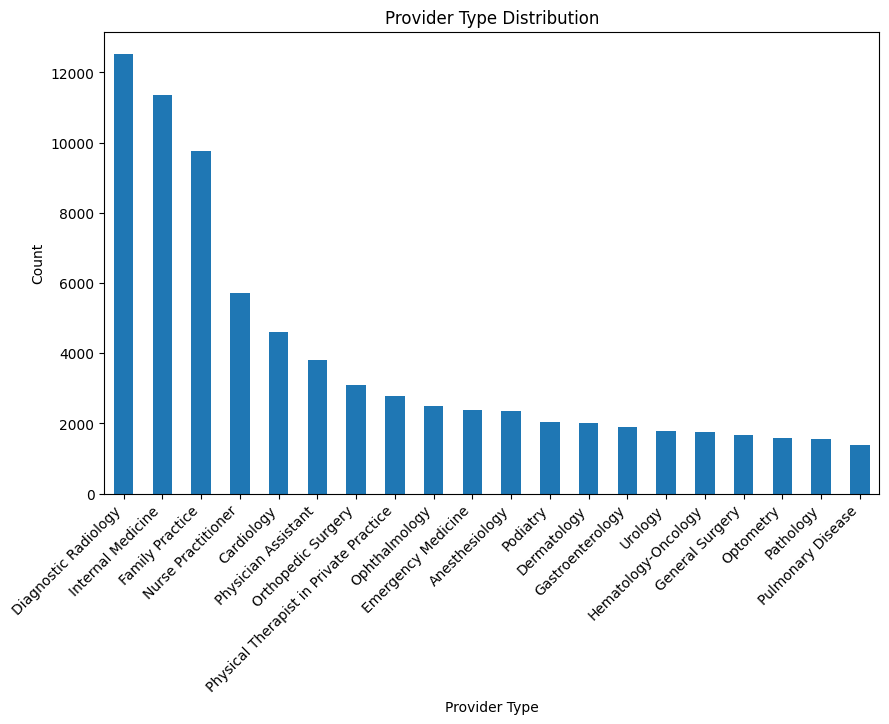

In [185]:
provider_type_counts = df['Provider Type'].value_counts().head(20)
provider_type_counts.plot(kind='bar', title='Provider Type Distribution', figsize=(10, 6))
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Most Common Provider type


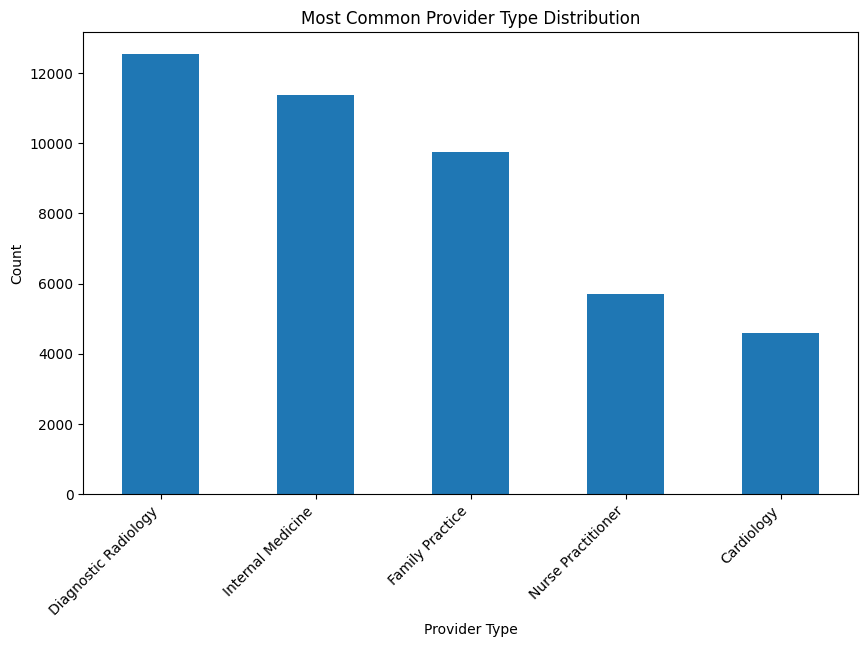

In [186]:
print("Most Common Provider type")
most_common_providers.plot(kind='bar', title='Most Common Provider Type Distribution', figsize=(10, 6))
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


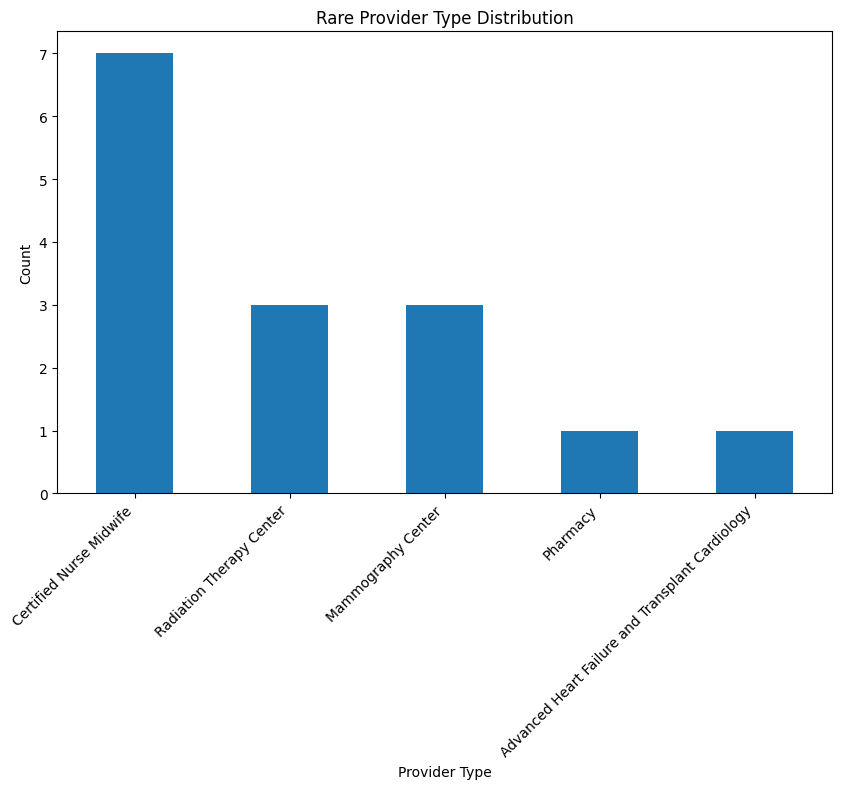

In [187]:
rare_providers.plot(kind='bar', title='Rare Provider Type Distribution', figsize=(10, 6))
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [188]:
missing_values=df.isnull().sum()
# print(missing_values)
percentages=(missing_values/len(df))*100
dataOfMissingValues=pd.DataFrame({'Missing_Values':missing_values,"Percentages":percentages})
dataOfMissingValues

Missing_Values  \
index                                                            0   
National Provider Identifier                                     0   
Last Name/Organization Name of the Provider                      0   
First Name of the Provider                                       0   
Middle Initial of the Provider                                   0   
Credentials of the Provider                                      0   
Gender of the Provider                                        4254   
Entity Type of the Provider                                      0   
Street Address 1 of the Provider                                 0   
City of the Provider                                             0   
Zip Code of the Provider                                         0   
State Code of the Provider                                       0   
Country Code of the Provider                                     0   
Provider Type                                                    0   
Medicare Participation Indicator                                 0   
Place of Service                                                 0   
HCPCS Code                                                       0   
HCPCS Description                                                0   
HCPCS Drug Indicator                                             0   
Number of Services                                               0   
Number of Medicare Beneficiaries                                 0   
Number of Distinct Medicare Beneficiary/Per Day...               0   
Average Medicare Allowed Amount                                  0   
Average Submitted Charge Amount                                  0   
Average Medicare Payment Amount                                  0   
Average Medicare Standardized Amount                             0   

                                                    Percentages  
index                                                     0.000  
National Provider Identifier                              0.000  
Last Name/Organization Name of the Provider               0.000  
First Name of the Provider                                0.000  
Middle Initial of the Provider                            0.000  
Credentials of the Provider                               0.000  
Gender of the Provider                                    4.254  
Entity Type of the Provider                               0.000  
Street Address 1 of the Provider                          0.000  
City of the Provider                                      0.000  
Zip Code of the Provider                                  0.000  
State Code of the Provider                                0.000  
Country Code of the Provider                              0.000  
Provider Type                                             0.000  
Medicare Participation Indicator                          0.000  
Place of Service                                          0.000  
HCPCS Code                                                0.000  
HCPCS Description                                         0.000  
HCPCS Drug Indicator                                      0.000  
Number of Services                                        0.000  
Number of Medicare Beneficiaries                          0.000  
Number of Distinct Medicare Beneficiary/Per Day...        0.000  
Average Medicare Allowed Amount                           0.000  
Average Submitted Charge Amount                           0.000  
Average Medicare Payment Amount                           0.000  
Average Medicare Standardized Amount                      0.000

In [189]:
# Fill missing values with a specific value, e.g., 'Unknown'
# df['Gender of the Provider'] = df['Gender of the Provider'].fillna('Unknown')
df['Gender of the Provider'].unique()

array(['F', 'M', nan], dtype=object)

In [190]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
M    66641
F    29105
Name: count, dtype: int64

In [191]:
# Calculate the mode of the Gender column
gender_mode = df['Gender of the Provider'].mode()[0]

# Fill NaN values with the mode
df['Gender of the Provider'] = df['Gender of the Provider'].fillna(gender_mode)

print("Filled missing values with mode:", gender_mode)


Filled missing values with mode: M


In [192]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
M    70895
F    29105
Name: count, dtype: int64

In [193]:
# df['Gender of the Provider'] = df['Gender of the Provider'].fillna(df['Gender of the Provider'].mean())

In [194]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
M    70895
F    29105
Name: count, dtype: int64

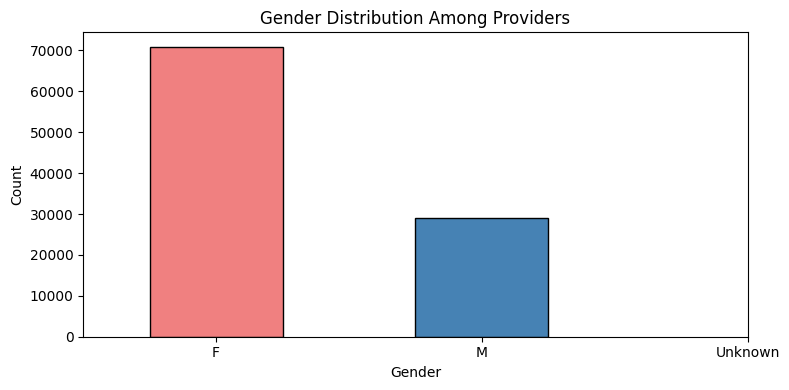

In [195]:
# Gender balance among providers
gender_counts = df['Gender of the Provider'].value_counts()
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar', color=['lightcoral', 'steelblue','green'], edgecolor='black')
plt.title('Gender Distribution Among Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2],labels=['F','M','Unknown'],rotation=0)
plt.tight_layout()
plt.show()

In [196]:

# Ensure the column is of string type before applying string operations
df['Average Medicare Allowed Amount'] = df['Average Medicare Allowed Amount'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Average Submitted Charge Amount'] = df['Average Submitted Charge Amount'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Average Medicare Payment Amount'] = df['Average Medicare Payment Amount'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Average Medicare Standardized Amount'] = df['Average Medicare Standardized Amount'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


In [197]:
df['Number of Services'] = pd.to_numeric(df['Number of Services'], errors='coerce')
df['Number of Medicare Beneficiaries'] = pd.to_numeric(df['Number of Medicare Beneficiaries'], errors='coerce')
df['Number of Distinct Medicare Beneficiary/Per Day Services'] = pd.to_numeric(df['Number of Distinct Medicare Beneficiary/Per Day Services'], errors='coerce')


In [198]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                       object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

In [199]:

# Fill missing values without using chained assignment
df['Number of Services'] = df['Number of Services'].fillna(df['Number of Services'].mean())
df['Number of Medicare Beneficiaries'] = df['Number of Medicare Beneficiaries'].fillna(df['Number of Medicare Beneficiaries'].mean())
df['Number of Distinct Medicare Beneficiary/Per Day Services'] = df['Number of Distinct Medicare Beneficiary/Per Day Services'].fillna(df['Number of Distinct Medicare Beneficiary/Per Day Services'].mean())


In [200]:
df.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Co

In [201]:
le = LabelEncoder()
df['Gender of the Provider'] = le.fit_transform(df['Gender of the Provider'])
df['Gender of the Provider'].unique()

array([0, 1])

In [202]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
1    70895
0    29105
Name: count, dtype: int64

In [203]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
1    70895
0    29105
Name: count, dtype: int64

In [204]:
# Calculate service metrics by gender 
service_metrics = df.groupby('Gender of the Provider')['Number of Services'].mean()
print("Service Metrics by Gender:") 
print(service_metrics)

Service Metrics by Gender:
Gender of the Provider
0     96.823492
1    102.114837
Name: Number of Services, dtype: float64


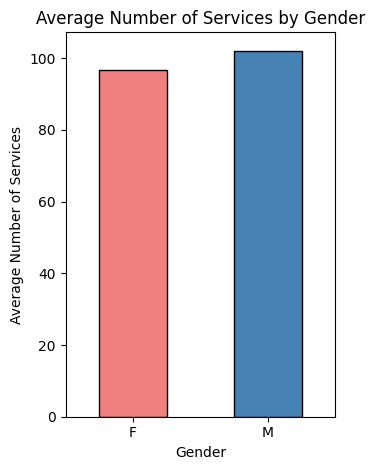

In [206]:
# Bar plot for service metrics
plt.subplot(1, 2, 1)
service_metrics.plot(kind='bar', color=['lightcoral', 'steelblue', 'green'], edgecolor='black')
plt.title('Average Number of Services by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Services')
plt.xticks(ticks=[0,1],labels=['F','M'],rotation=0)
plt.tight_layout()
plt.show()


In [207]:
# Calculate financial metrics by gender 
financial_metrics = df.groupby('Gender of the Provider')[['Average Medicare Allowed Amount', 'Average Medicare Payment Amount']].mean()
print("\nFinancial Metrics by Gender:") 
print(financial_metrics)


Financial Metrics by Gender:
                        Average Medicare Allowed Amount  \
Gender of the Provider                                    
0                                             81.191069   
1                                            109.744685   

                        Average Medicare Payment Amount  
Gender of the Provider                                   
0                                             61.585881  
1                                             83.834156  


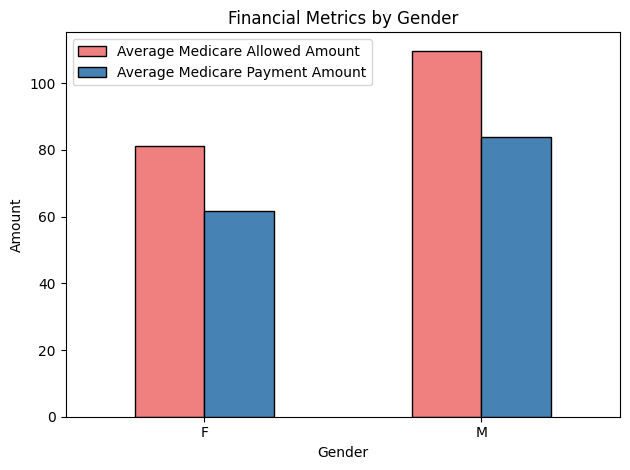

In [208]:
# Bar plot for financial metrics
# plt.subplot(1, 2, 2)
financial_metrics.plot(kind='bar', color=['lightcoral', 'steelblue'], edgecolor='black')
plt.title('Financial Metrics by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.xticks(ticks=[0,1],labels=['F','M'],rotation=0)
plt.tight_layout()
plt.show()

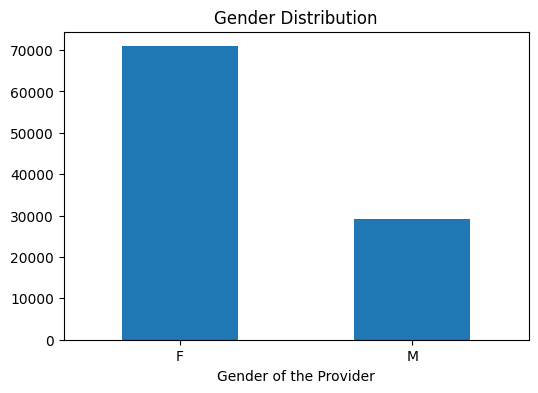

In [210]:
gender_counts = df['Gender of the Provider'].value_counts()
gender_counts.plot(kind='bar', title='Gender Distribution', figsize=(6, 4))
plt.xticks(ticks=[0,1],labels=['F','M'],rotation=0)
plt.show()




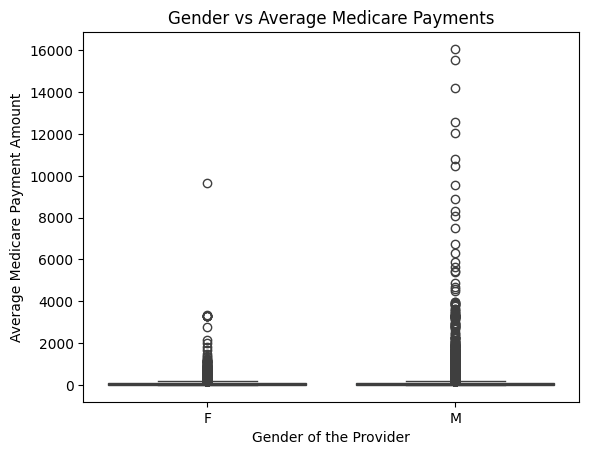

In [212]:
# Boxplot for gender vs financial metrics
sns.boxplot(x='Gender of the Provider', y='Average Medicare Payment Amount', data=df)
plt.title('Gender vs Average Medicare Payments')
plt.xticks(ticks=[0,1],labels=['F','M'],rotation=0)
plt.show()

C:\Users\katta\AppData\Local\Temp\ipykernel_18056\3235314486.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




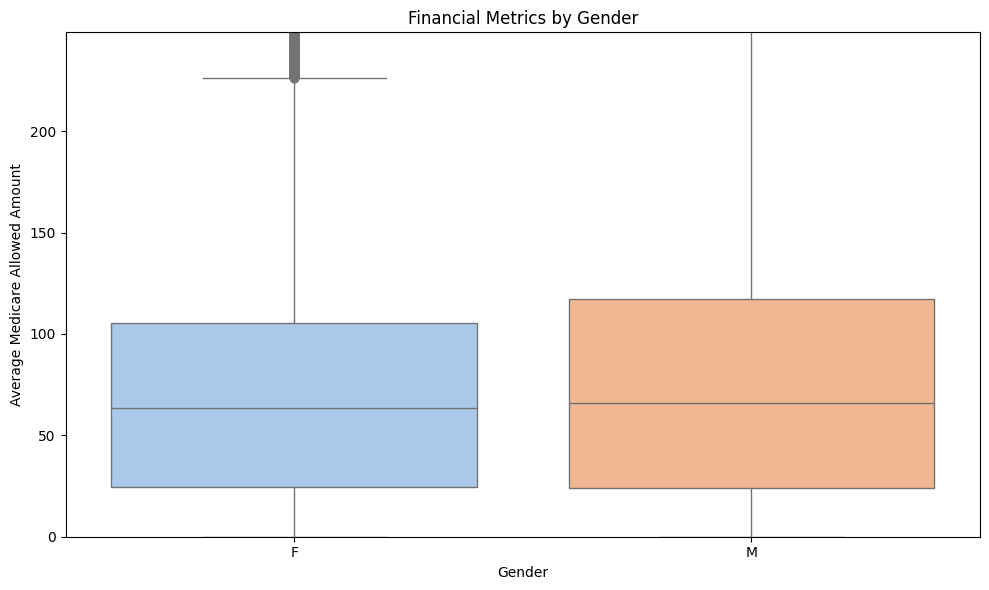

In [213]:


# # Convert financial data to numeric and clean missing values
# df['Average Medicare Allowed Amount'] = pd.to_numeric(
#     df['Average Medicare Allowed Amount'], errors='coerce'
# )


financial_by_gender = df[['Gender of the Provider', 'Average Medicare Allowed Amount']]
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Gender of the Provider',
    y='Average Medicare Allowed Amount',
    data=financial_by_gender,
    palette='pastel'
)
plt.title('Financial Metrics by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Medicare Allowed Amount')
plt.ylim(0, financial_by_gender['Average Medicare Allowed Amount'].quantile(0.95)) 
plt.xticks(ticks=[0,1],labels=['F','M'],rotation=0)
plt.tight_layout()
plt.show()


### **2. Geographic Insights**
#### Insights:
- **State-wise Distribution:**
  - Identify states with the highest and lowest provider counts.
  - Compare state-level financial performance and service volume.

- **City-wise Analysis:**
  - Highlight cities with the most active healthcare providers.
  - Pinpoint regions with unusually high or low service costs.

#### Visualizations:
- Heatmaps for state-wise provider and payment metrics.
- Choropleth maps for geographic trends.

In [214]:
# State Code Mapping
state_code_map = {
    'MO': 'Missouri', 'NC': 'North Carolina', 'CT': 'Connecticut', 'FL': 'Florida',
    'VA': 'Virginia', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania',
    'AZ': 'Arizona', 'KY': 'Kentucky', 'DC': 'District of Columbia', 'WA': 'Washington',
    'TX': 'Texas', 'NJ': 'New Jersey', 'MD': 'Maryland', 'LA': 'Louisiana',
    'OH': 'Ohio', 'NY': 'New York', 'GU': 'Guam', 'IL': 'Illinois',
    'OK': 'Oklahoma', 'SC': 'South Carolina', 'MA': 'Massachusetts', 'GA': 'Georgia',
    'IN': 'Indiana', 'ME': 'Maine', 'MT': 'Montana', 'WI': 'Wisconsin',
    'AL': 'Alabama', 'OR': 'Oregon', 'NH': 'New Hampshire', 'KS': 'Kansas',
    'MI': 'Michigan', 'ID': 'Idaho', 'MS': 'Mississippi', 'MN': 'Minnesota',
    'TN': 'Tennessee', 'IA': 'Iowa', 'NE': 'Nebraska', 'AK': 'Alaska',
    'ZZ': 'Unknown State', 'VT': 'Vermont', 'NV': 'Nevada', 'AR': 'Arkansas',
    'WV': 'West Virginia', 'HI': 'Hawaii', 'RI': 'Rhode Island', 'SD': 'South Dakota',
    'PR': 'Puerto Rico', 'UT': 'Utah', 'NM': 'New Mexico', 'ND': 'North Dakota',
    'DE': 'Delaware', 'WY': 'Wyoming', 'VI': 'Virgin Islands', 'AE': 'Armed Forces Europe',
    'AP': 'Armed Forces Pacific', 'AA': 'Armed Forces Americas'
}

# Country Code Mapping
country_code_map = {
    'US': 'United States', 'JP': 'Japan', 'DE': 'Germany', 'TR': 'Turkey'
}

# Apply Mapping
df['State Code of the Provider'] = df['State Code of the Provider'].map(state_code_map)
df['Country Code of the Provider'] = df['Country Code of the Provider'].map(country_code_map)


In [215]:
df['State Code of the Provider'].unique()

array(['Missouri', 'North Carolina', 'Connecticut', 'Florida', 'Virginia',
       'California', 'Colorado', 'Pennsylvania', 'Arizona', 'Kentucky',
       'District of Columbia', 'Washington', 'Texas', 'New Jersey',
       'Maryland', 'Louisiana', 'Ohio', 'New York', 'Guam', 'Illinois',
       'Oklahoma', 'South Carolina', 'Massachusetts', 'Georgia',
       'Indiana', 'Maine', 'Montana', 'Wisconsin', 'Alabama', 'Oregon',
       'New Hampshire', 'Kansas', 'Michigan', 'Idaho', 'Mississippi',
       'Minnesota', 'Tennessee', 'Iowa', 'Nebraska', 'Alaska',
       'Unknown State', 'Vermont', 'Nevada', 'Arkansas', 'West Virginia',
       'Hawaii', 'Rhode Island', 'South Dakota', 'Puerto Rico', 'Utah',
       'New Mexico', 'North Dakota', 'Delaware', 'Wyoming',
       'Virgin Islands', 'Armed Forces Europe', 'Armed Forces Pacific',
       'Armed Forces Americas'], dtype=object)

In [216]:
a=df['State Code of the Provider'].value_counts().head(5)
print(a)

State Code of the Provider
California      7775
Florida         7263
Texas           6861
New York        6361
Pennsylvania    4561
Name: count, dtype: int64


In [217]:
a=df['State Code of the Provider'].value_counts().tail(5)
print(a)

State Code of the Provider
Guam                     15
Unknown State             6
Armed Forces Pacific      3
Armed Forces Europe       2
Armed Forces Americas     1
Name: count, dtype: int64


states with the highest and lowest provider counts


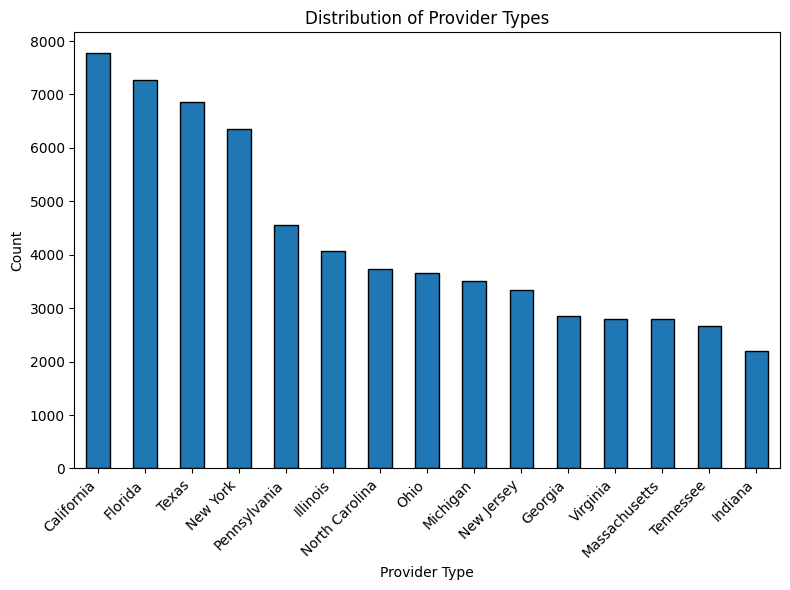

In [218]:
print("states with the highest and lowest provider counts")
# Get counts of each provider type
states_type_counts = df['State Code of the Provider'].value_counts().head(15)
plt.figure(figsize=(8, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [219]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                        int64
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

In [220]:
# Calculate state-level financial performance and service volume
state_financial_metrics = df.groupby('State Code of the Provider')[['Average Medicare Allowed Amount', 'Number of Services']].mean()


In [221]:
state_financial_metrics

Average Medicare Allowed Amount  \
State Code of the Provider                                    
Alabama                                           92.265197   
Alaska                                           114.213675   
Arizona                                          108.402551   
Arkansas                                         102.315526   
Armed Forces Americas                             29.180000   
Armed Forces Europe                              131.405000   
Armed Forces Pacific                              78.306992   
California                                       118.030722   
Colorado                                         109.528585   
Connecticut                                      105.613171   
Delaware                                         115.452810   
District of Columbia                             136.009941   
Florida                                          121.984556   
Georgia                                           89.737500   
Guam                                             167.652747   
Hawaii                                            83.806045   
Idaho                                             88.366553   
Illinois                                          97.173000   
Indiana                                           87.701209   
Iowa                                              88.433136   
Kansas                                           111.267563   
Kentucky                                          92.478515   
Louisiana                                         92.706537   
Maine                                            102.393321   
Maryland                                         113.409051   
Massachusetts                                     98.045503   
Michigan                                          96.620111   
Minnesota                                         77.017872   
Mississippi                                       88.859759   
Missouri                                          92.626991   
Montana                                           96.756378   
Nebraska                                          89.649672   
Nevada                                           133.731268   
New Hampshire                                     98.855755   
New Jersey                                       117.622708   
New Mexico                                        99.041515   
New York                                         110.186869   
North Carolina                                    92.357150   
North Dakota                                      77.946949   
Ohio                                              97.477907   
Oklahoma                                          87.707215   
Oregon                                            83.503044   
Pennsylvania                                      95.401839   
Puerto Rico                                       65.251046   
Rhode Island                                      95.031511   
South Carolina                                    99.828091   
South Dakota                                     122.109369   
Tennessee                                         76.875429   
Texas                                            101.664589   
Unknown State                                     57.373311   
Utah                                             107.171690   
Vermont                                           88.961756   
Virgin Islands                                   197.099666   
Virginia                                          96.572879   
Washington                                        97.195361   
West Virginia                                     99.924579   
Wisconsin                                         88.396722   
Wyoming                                           86.448396   

                            Number of Services  
State Code of the Provider                      
Alabama                             106.665287  
Alaska                               65.981818  
Arizona                             104.902838  
Ar

Column names in state_financial_metrics:
Index(['Average Medicare Allowed Amount', 'Number of Services'], dtype='object')
Displays the average Medicare Allowed Amount by state.


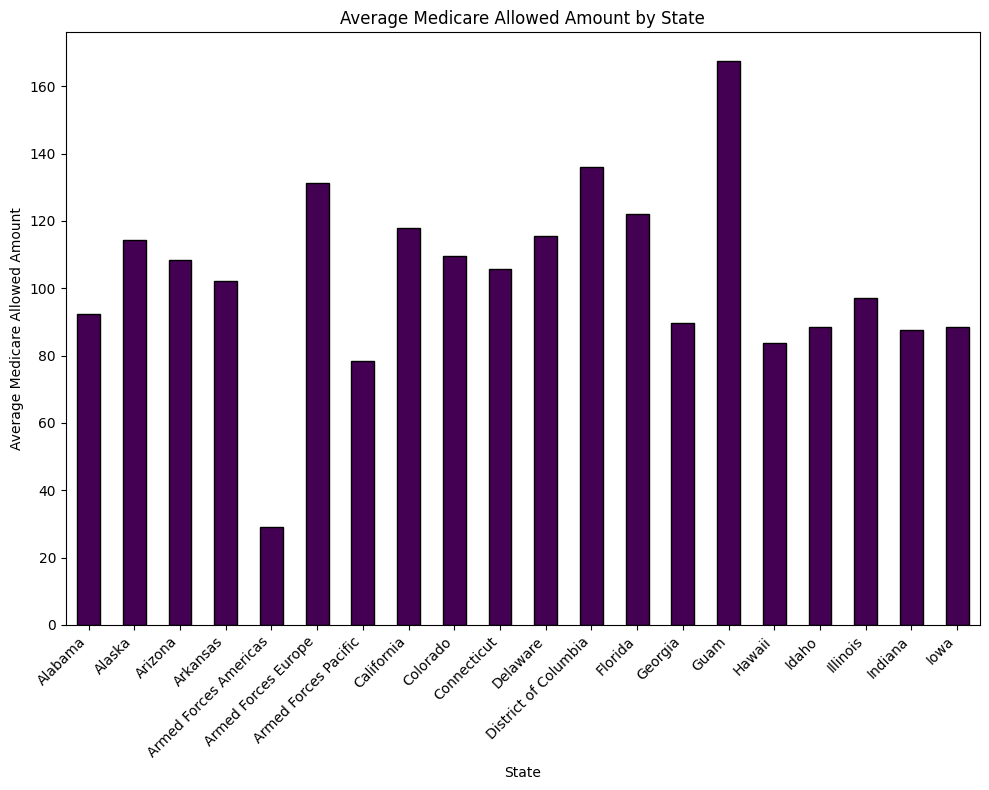

In [222]:

# Check column names
print("Column names in state_financial_metrics:")
print(state_financial_metrics.columns)
print("Displays the average Medicare Allowed Amount by state.")
# Plot the data if the column exists
# if 'Average Medicare Allowed Amount' in state_financial_metrics.columns:
plt.figure(figsize=(10, 8))
# a=state_financial_metrics.head(20)
state_financial_metrics['Average Medicare Allowed Amount'].head(20).plot(kind='bar', edgecolor='black', colormap='viridis')
plt.title('Average Medicare Allowed Amount by State')
plt.xlabel('State')
plt.ylabel('Average Medicare Allowed Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# else:
#     print("Column 'Average Medicare Allowed Amount' does not exist in the DataFrame.")


Displays the average Number of Services provided by state.


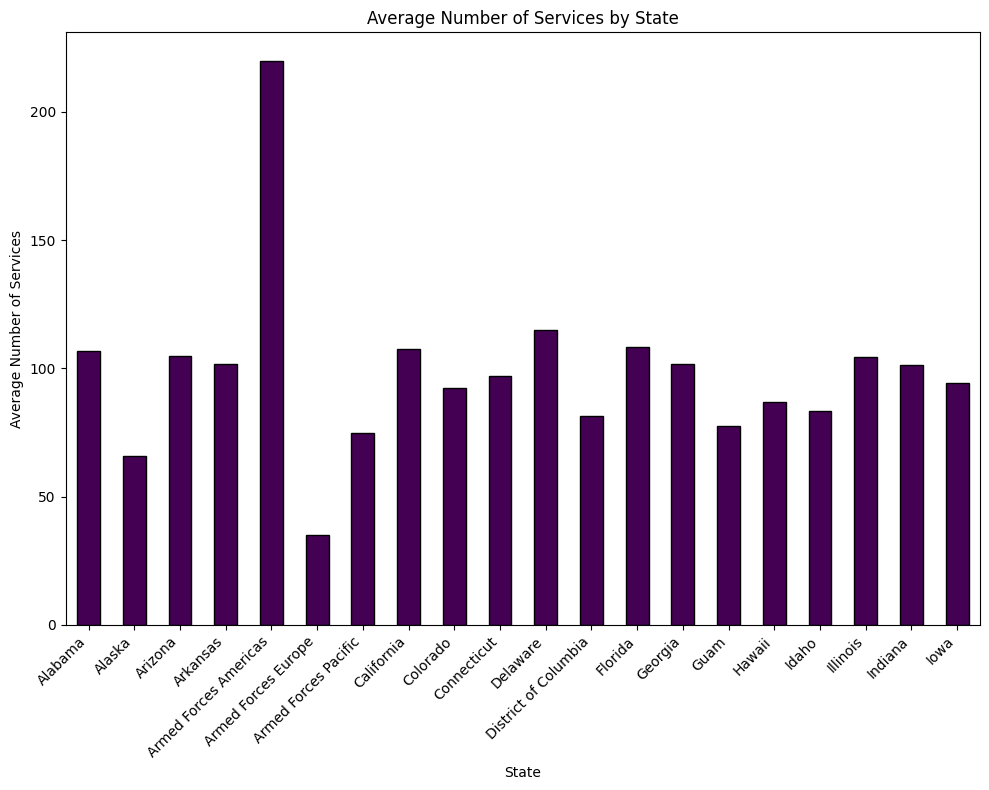

In [223]:
# Bar chart for state-level service volume
print("Displays the average Number of Services provided by state.")
plt.figure(figsize=(10, 8))
state_financial_metrics['Number of Services'].head(20).plot(kind='bar', edgecolor='black', colormap='viridis')
plt.title('Average Number of Services by State')
plt.xlabel('State')
plt.ylabel('Average Number of Services')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [224]:
df.isnull().sum()

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Co

In [225]:
a=df['City of the Provider'].value_counts().head(5)
print(a)

City of the Provider
NEW YORK        1061
HOUSTON          874
CHICAGO          759
PHILADELPHIA     658
BOSTON           634
Name: count, dtype: int64


In [226]:
a=df['City of the Provider'].value_counts().tail(5)
print(a)

City of the Provider
HERMANN      1
VANCEBURG    1
KEOSAUQUA    1
ENSENADA     1
GREENWAY     1
Name: count, dtype: int64


In [227]:
# Group by state and calculate the mean service cost
city_service_costs = df.groupby('City of the Provider')['Average Medicare Allowed Amount'].mean()
highest_service_costs = city_service_costs.nlargest(5) 
lowest_service_costs = city_service_costs.nsmallest(5) 


print("Regions with the Highest Service Costs:") 
print(highest_service_costs) 


print("\nRegions with the Lowest Service Costs:") 
print(lowest_service_costs)
print(city_service_costs.shape)

Regions with the Highest Service Costs:
City of the Provider
MAYS LANDING     16488.868117
DEQUEEN           4843.097208
KINGSFORD         2186.287703
AZUSA             2152.190000
OLD GREENWICH     1713.620000
Name: Average Medicare Allowed Amount, dtype: float64

Regions with the Lowest Service Costs:
City of the Provider
FRANKENMUTH     0.050000
WILDWOOD        0.050000
CITRONELLE      0.113750
FT BRANCH       0.116389
ARIZONA CITY    0.116549
Name: Average Medicare Allowed Amount, dtype: float64
(5846,)


cities with the highest provider counts


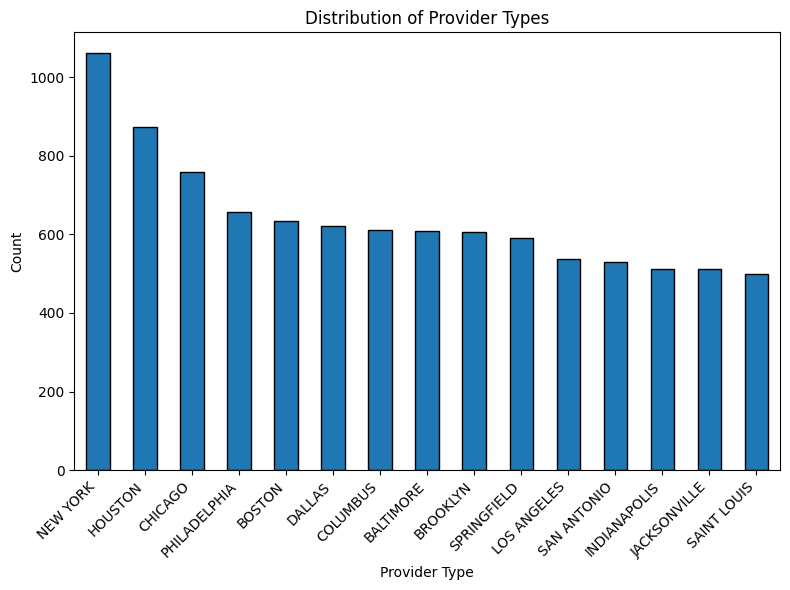

cities with the lowest provider counts


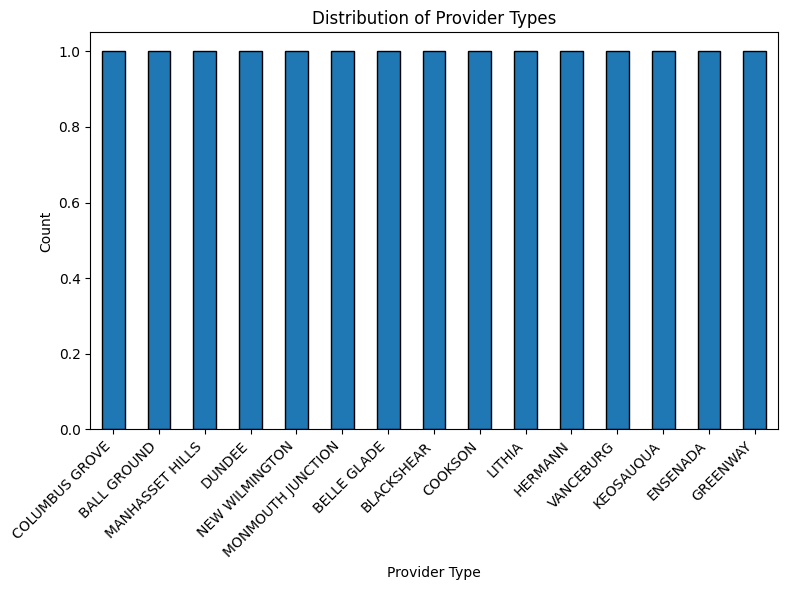

In [228]:
print("cities with the highest provider counts")
# Get counts of each provider type
states_type_counts = df['City of the Provider'].value_counts().head(15)
plt.figure(figsize=(8, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("cities with the lowest provider counts")
# Get counts of each provider type
states_type_counts = df['City of the Provider'].value_counts().tail(15)
plt.figure(figsize=(8, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [229]:
city_metrics = df.groupby('City of the Provider')[['Average Medicare Allowed Amount', 'Number of Services']].mean()
city_metrics

Average Medicare Allowed Amount  Number of Services
City of the Provider                                                     
ABBEVILLE                                   23.840881           29.000000
ABERDEEN                                    67.566694          111.136657
ABILENE                                    105.252860           95.133981
ABINGDON                                    76.404262           93.450000
ABINGTON                                    93.252754           68.888889
...                                               ...                 ...
ZEPHYRHILLS                                118.864293           96.054054
ZIMMERMAN                                  106.850000           14.000000
ZION                                        85.882684           25.000000
ZIONSVILLE                                  61.380000           51.000000
ZUNI                                        79.640000          125.000000

[5846 rows x 2 columns]

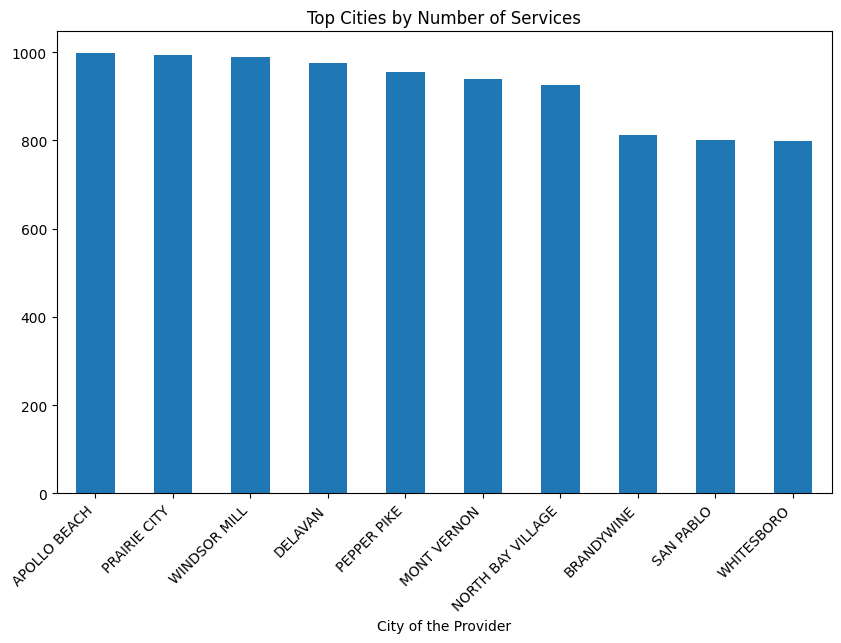

In [230]:

top_cities = city_metrics.sort_values('Number of Services', ascending=False).head(10)
top_cities['Number of Services'].plot(kind='bar', title='Top Cities by Number of Services', figsize=(10, 6))
plt.xticks(rotation=45,ha='right')
plt.show()


Correlation Between Service Volume and Costs:

If there’s a pattern (e.g., upward trend), it could indicate that states with higher service volumes tend to have higher or lower Medicare costs on average.
Lack of correlation might suggest that service volume and cost are unrelated.

State-Level Variations:

States with large, dark-colored points represent regions with high costs and potentially low service volumes (specialized or expensive care).
States with small, light-colored points may indicate low-cost and high-volume services.

Outliers:

Points that deviate significantly from the trendline or cluster could represent states with unusual healthcare practices:
High costs but low service volumes.
High service volumes but low costs.

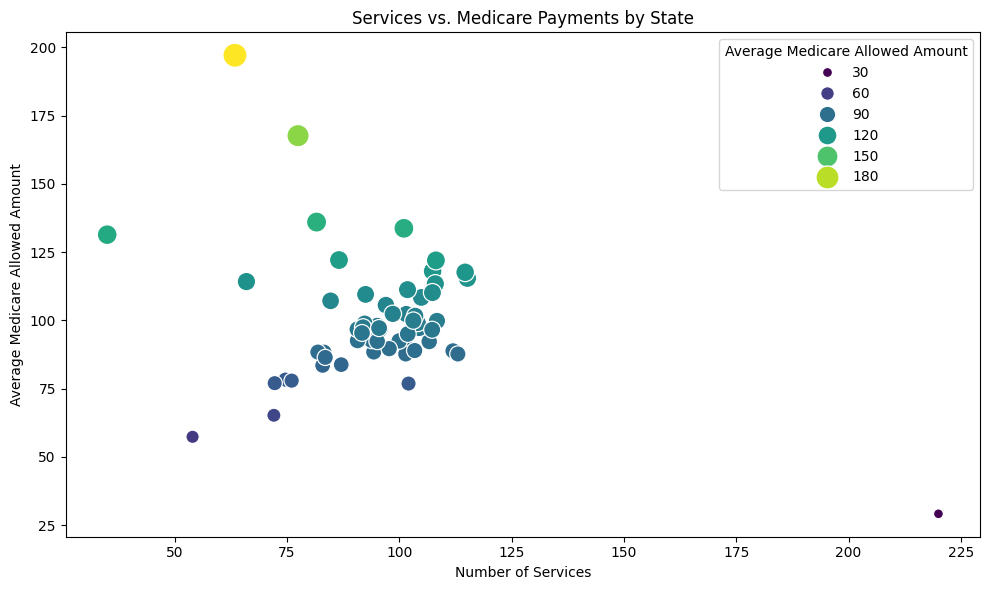

In [231]:
# Scatter plot for services vs. Medicare payments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=state_financial_metrics,
    x='Number of Services',
    y='Average Medicare Allowed Amount',
    hue='Average Medicare Allowed Amount',
    palette='viridis',
    size='Average Medicare Allowed Amount',
    sizes=(50, 300)
)
plt.title('Services vs. Medicare Payments by State')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Allowed Amount')
plt.tight_layout()
plt.show()


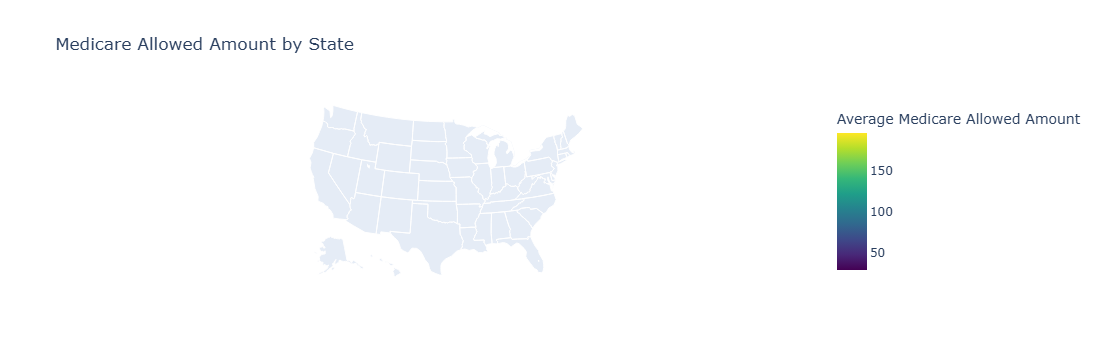

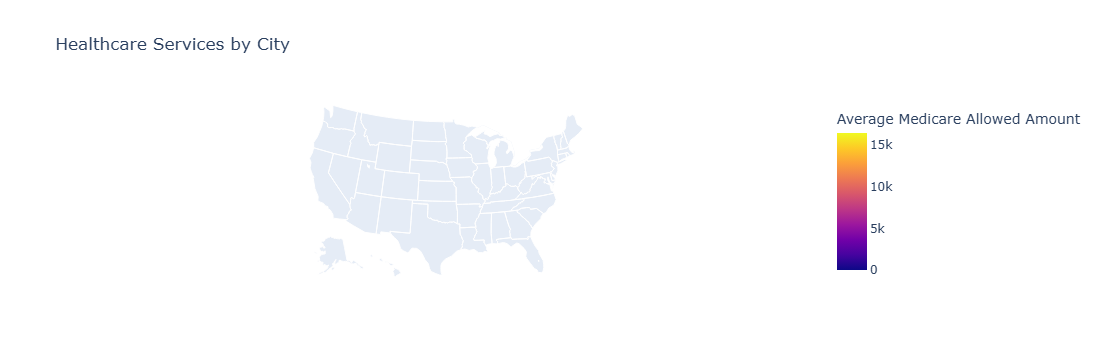

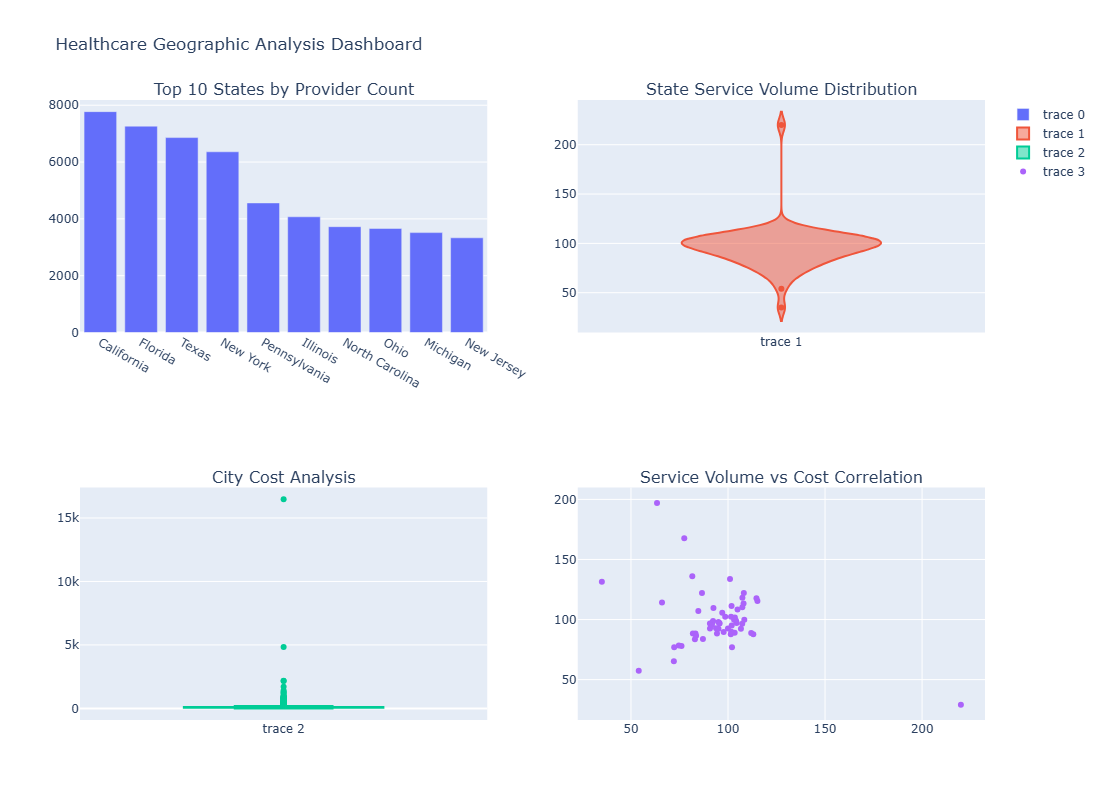


Top 10 Cities by Service Volume:
City of the Provider  State Code of the Provider  Average Medicare Allowed Amount  Number of Services
BALTIMORE             Maryland                    119.774739                       54843.873956          1
BROOKLYN              New York                    132.647521                       70083.944571          1
CHICAGO               Illinois                    92.353785                        71572.621868          1
DALLAS                Texas                       115.455656                       55205.196659          1
HOUSTON               Texas                       107.842242                       83106.645407          1
LOS ANGELES           California                  116.209537                       51097.921033          1
NEW YORK              New York                    131.551828                       101633.944571         1
PHILADELPHIA          Pennsylvania                112.411646                       55912.472286          1
PHOENIX 

In [232]:

def analyze_healthcare_geography(df):
    # State Analysis
    state_stats = df.groupby('State Code of the Provider').agg({
        'Average Medicare Allowed Amount': 'mean',
        'Number of Services': 'mean'
    }).reset_index()
    
    # Create state choropleth
    fig_state = px.choropleth(
        state_stats,
        locations='State Code of the Provider',
        locationmode='USA-states',
        color='Average Medicare Allowed Amount',
        scope='usa',
        title='Medicare Allowed Amount by State',
        color_continuous_scale='Viridis'
    )
    
    # City Analysis with bubble map
    city_stats = df.groupby(['City of the Provider', 'State Code of the Provider']).agg({
        'Average Medicare Allowed Amount': 'mean',
        'Number of Services': 'sum'
    }).reset_index()
    
    # Get lat/long for cities (simplified for example)
    fig_city = px.scatter_geo(
        city_stats,
        locations='State Code of the Provider',
        locationmode='USA-states',
        size='Number of Services',
        color='Average Medicare Allowed Amount',
        hover_name='City of the Provider',
        scope='usa',
        title='Healthcare Services by City',
        size_max=50
    )
    
    # Combined metrics dashboard
    fig_dashboard = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Top 10 States by Provider Count',
            'State Service Volume Distribution',
            'City Cost Analysis',
            'Service Volume vs Cost Correlation'
        )
    )
    
    # Add subplots
    # Top states
    top_states = df['State Code of the Provider'].value_counts().head(10)
    fig_dashboard.add_trace(
        go.Bar(x=top_states.index, y=top_states.values),
        row=1, col=1
    )
    
    # Service volume distribution
    fig_dashboard.add_trace(
        go.Violin(y=state_stats['Number of Services']),
        row=1, col=2
    )
    
    # City cost analysis
    city_costs = df.groupby('City of the Provider')['Average Medicare Allowed Amount'].mean().sort_values()
    fig_dashboard.add_trace(
        go.Box(y=city_costs),
        row=2, col=1
    )
    
    # Correlation plot
    fig_dashboard.add_trace(
        go.Scatter(
            x=state_stats['Number of Services'],
            y=state_stats['Average Medicare Allowed Amount'],
            mode='markers'
        ),
        row=2, col=2
    )
    
    fig_dashboard.update_layout(height=800, title_text='Healthcare Geographic Analysis Dashboard')
    
    return {
        'state_map': fig_state,
        'city_map': fig_city,
        'dashboard': fig_dashboard,
        'top_cities': city_stats.nlargest(10, 'Number of Services'),
        'cost_outliers': city_stats[
            abs(city_stats['Average Medicare Allowed Amount'] - 
                city_stats['Average Medicare Allowed Amount'].mean()) > 
            (2 * city_stats['Average Medicare Allowed Amount'].std())
        ]
    }

# Example usage

results = analyze_healthcare_geography(df)
results['state_map'].show()
results['city_map'].show()
results['dashboard'].show()
print("\nTop 10 Cities by Service Volume:")
print(results['top_cities'].value_counts())
print("\nCities with Unusual Costs:")
print(results['cost_outliers'])


### **3. Financial Performance**
#### Insights:
- **Charge vs Payment Discrepancies:**
  - Analyze average submitted charges vs Medicare payments.
  - Spot providers with unusually high charge-to-payment ratios.

- **Service Cost Distribution:**
  - Identify cost variations across provider types or regions.

#### Visualizations:
- Scatter plots for charge vs payment comparisons.
- Histograms and KDE plots for service cost distributions.


In [233]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                        int64
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

In [234]:
df['Charge-to-Payment Ratio'] = df['Average Submitted Charge Amount'] / df['Average Medicare Payment Amount']
df['Charge-to-Payment Ratio']

0        1.940778
1        4.618362
2        2.405350
3        1.457726
4        2.047146
           ...   
99995    3.524055
99996    4.800727
99997    7.774695
99998    2.171734
99999    1.576076
Name: Charge-to-Payment Ratio, Length: 100000, dtype: float64

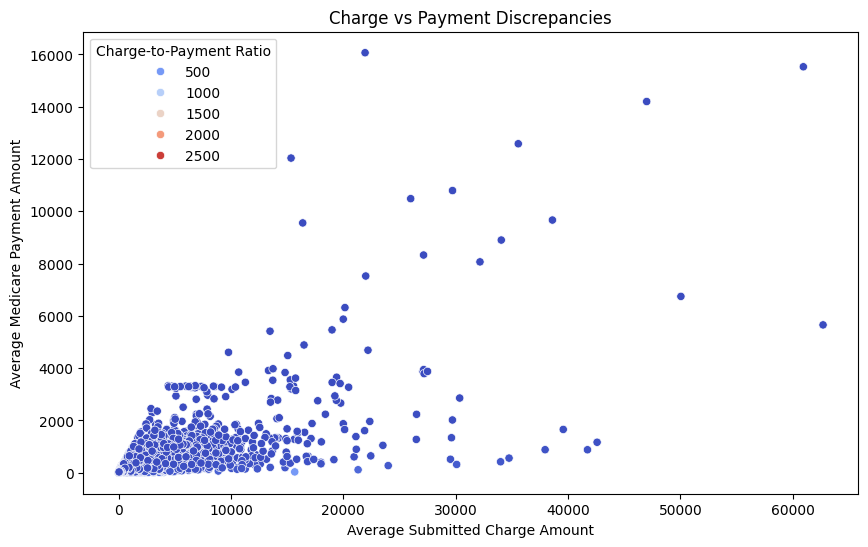

In [235]:


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Average Submitted Charge Amount',
    y='Average Medicare Payment Amount',
    hue='Charge-to-Payment Ratio', 
    data=df, 
    palette='coolwarm'
)
plt.title("Charge vs Payment Discrepancies")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Average Medicare Payment Amount")
plt.legend(title="Charge-to-Payment Ratio")
plt.show()


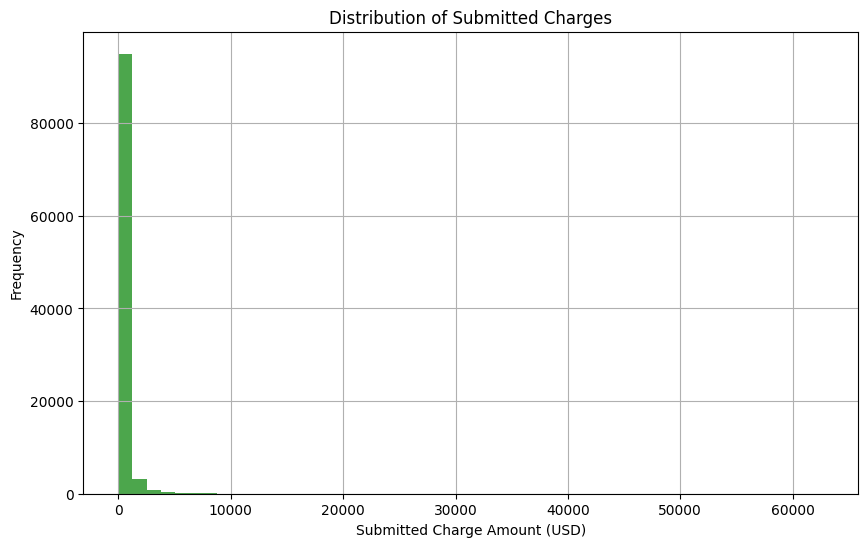

In [236]:
plt.figure(figsize=(10, 6))
plt.hist(df['Average Submitted Charge Amount'], bins=50, color='green', alpha=0.7)
plt.title("Distribution of Submitted Charges")
plt.xlabel("Submitted Charge Amount (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


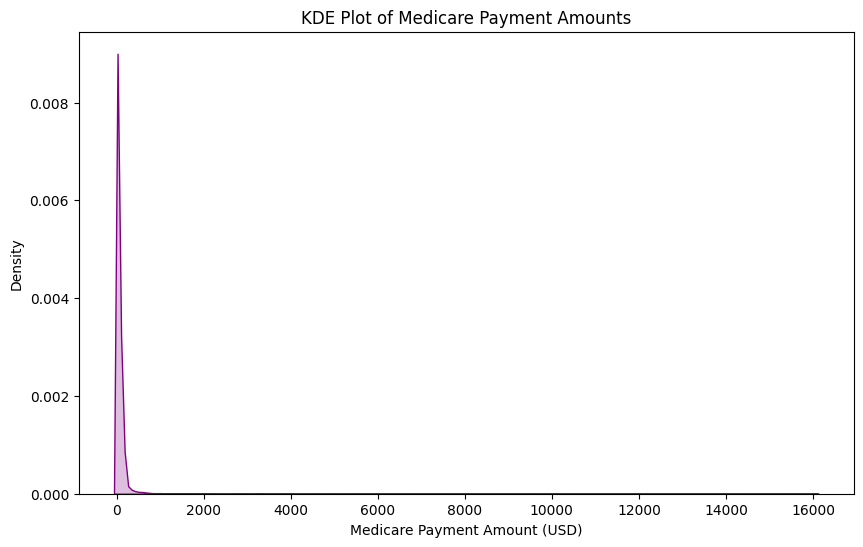

In [237]:

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Average Medicare Payment Amount'], fill=True, color='purple')
plt.title("KDE Plot of Medicare Payment Amounts")
plt.xlabel("Medicare Payment Amount (USD)")
plt.ylabel("Density")
plt.show()


In [238]:
outliers = df[df['Charge-to-Payment Ratio'] > 5]  # Example threshold
outliers[['Provider Type', 'Charge-to-Payment Ratio']].head()


Provider Type  Charge-to-Payment Ratio
5   Physical Therapist in Private Practice                 6.522273
8                          Family Practice                 5.000676
11                    Diagnostic Radiology                 6.251817
12                    Diagnostic Radiology                 5.822017
20                    Diagnostic Radiology                10.104941

In [239]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                        int64
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

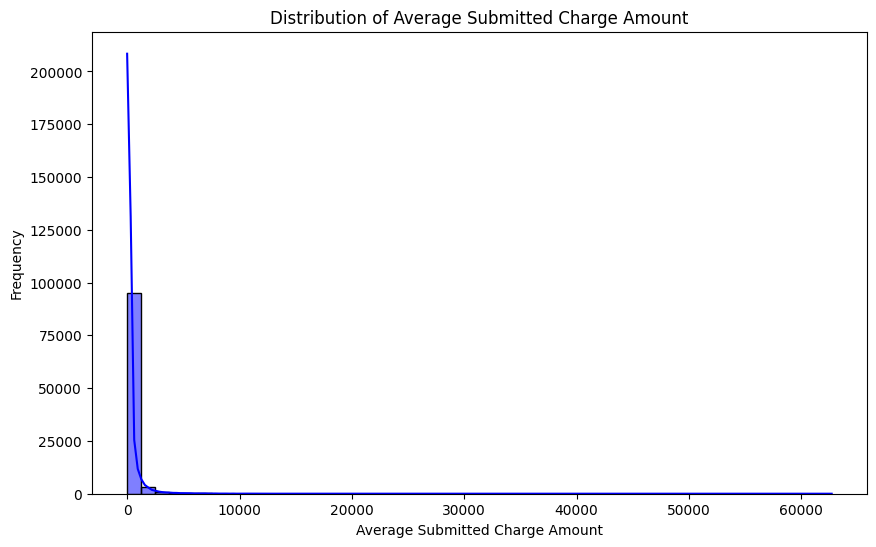

In [240]:
# Overall Distribution: Histogram and KDE for Submitted Charge Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Submitted Charge Amount'], kde=True, color='blue', bins=50)
plt.title("Distribution of Average Submitted Charge Amount")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Frequency")
plt.show()


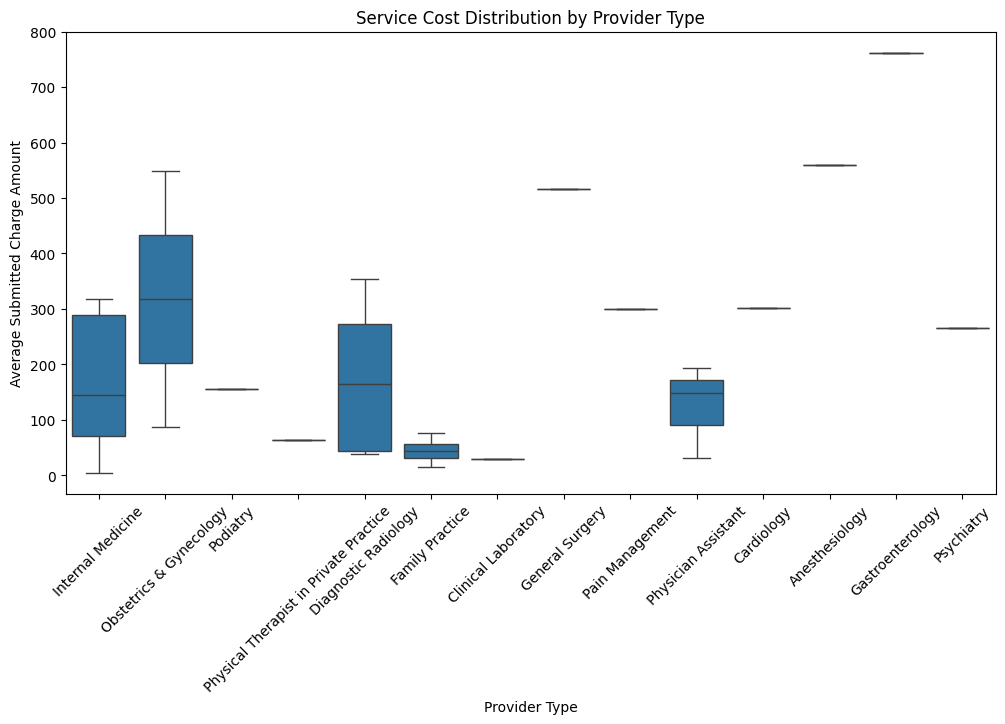

In [241]:

# Boxplot: Service Cost Distribution by Provider Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Provider Type', y='Average Submitted Charge Amount', data=df.head(30))
plt.title("Service Cost Distribution by Provider Type")
plt.xticks(rotation=45)
plt.show()




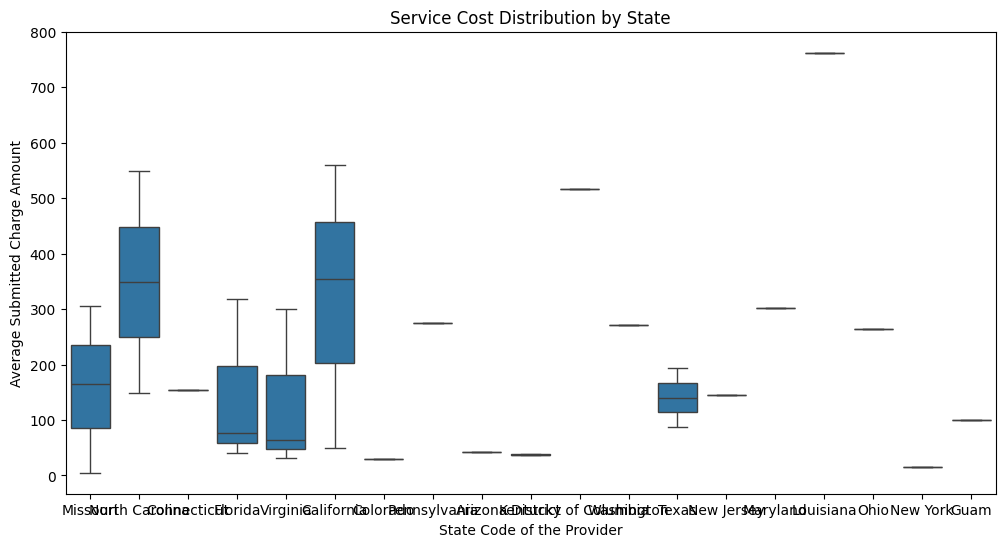

In [242]:
# Boxplot: Service Cost Distribution by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State Code of the Provider', y='Average Submitted Charge Amount', data=df.head(30))
plt.title("Service Cost Distribution by State")
plt.xticks(rotation=0)
plt.show()

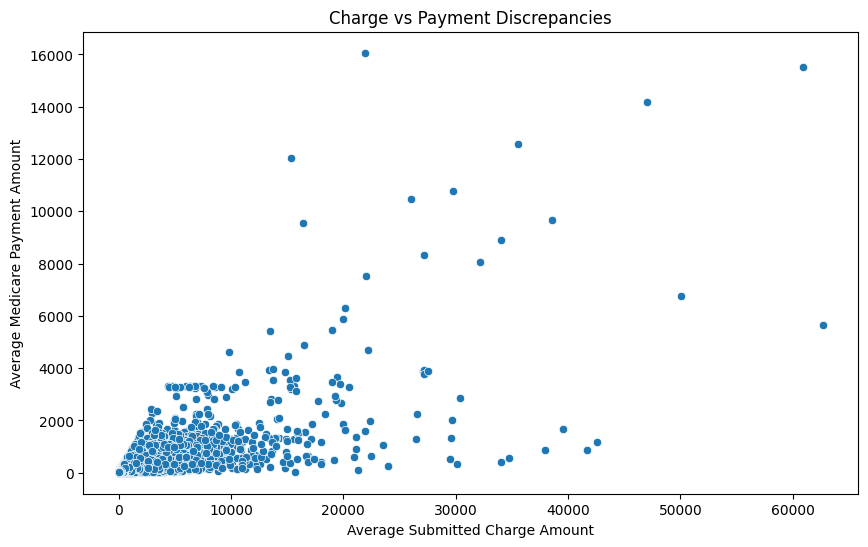

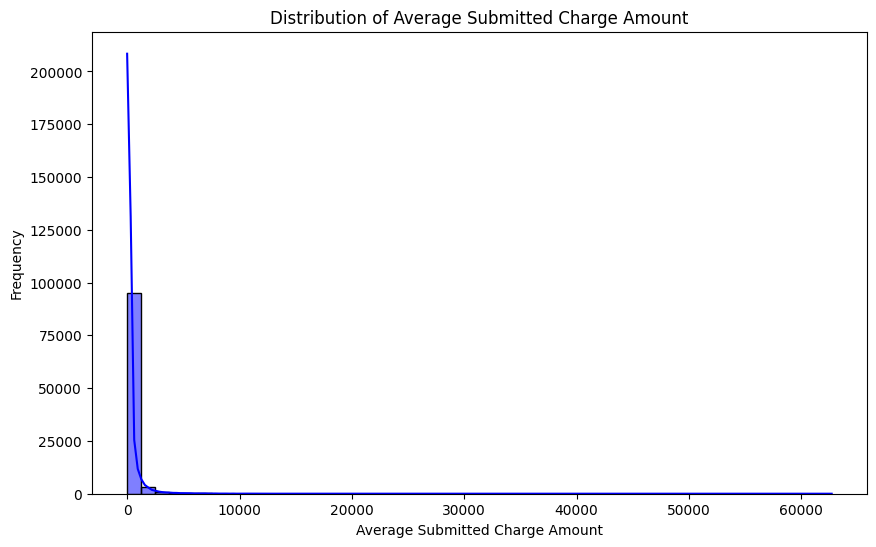

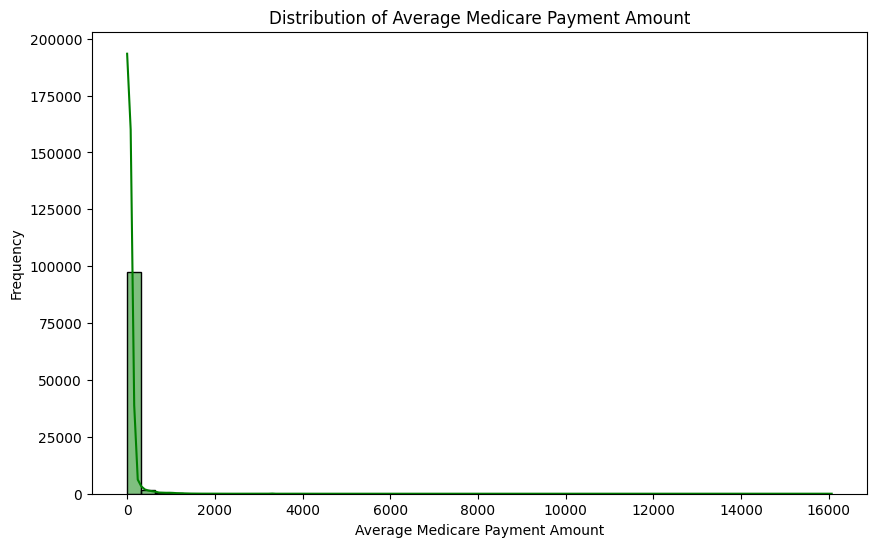

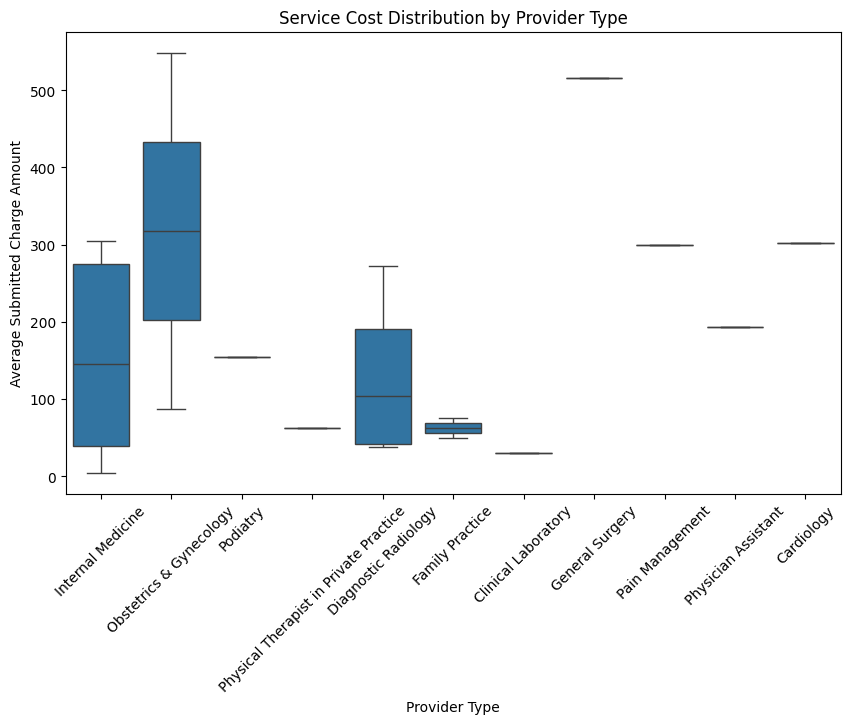

In [243]:
# Step 1: Scatter Plot for Charge vs Payment Discrepancy

# Scatter plot to visualize charge vs payment discrepancies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Submitted Charge Amount', y='Average Medicare Payment Amount', data=df)
plt.title("Charge vs Payment Discrepancies")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Average Medicare Payment Amount")
plt.show()

# Step 2: Histogram and KDE for Service Cost Distribution
# Histogram and KDE for Submitted Charge Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Submitted Charge Amount'], kde=True, color='blue', bins=50)
plt.title("Distribution of Average Submitted Charge Amount")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Frequency")
plt.show()

# Histogram and KDE for Medicare Payment Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Medicare Payment Amount'], kde=True, color='green', bins=50)
plt.title("Distribution of Average Medicare Payment Amount")
plt.xlabel("Average Medicare Payment Amount")
plt.ylabel("Frequency")
plt.show()

# Step 3: Additional Analysis by Provider Type (Optional)
# Plot service cost distribution by Provider Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Provider Type', y='Average Submitted Charge Amount', data=df.head(20))
plt.title("Service Cost Distribution by Provider Type")
plt.xticks(rotation=45)
plt.show()


### **4. Anomaly Detection**
#### Insights:
- **Outlier Providers:**
  - Detect providers with unusually high or low service volumes or payments.
  - Identify potential fraud or inefficiencies.

- **HCPCS Code Analysis:**
  - Highlight codes associated with extreme values or anomalies.

#### Visualizations:
- Boxplots and violin plots for service and payment outliers.
- Pareto charts for top-contributing HCPCS codes.


In [244]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                        int64
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

In [245]:
# Compute Z-scores for service volumes and payments
from scipy.stats import zscore

# Calculate Z-scores
df['Service Volume Z-Score'] = zscore(df['Number of Services'])
df['Payment Z-Score'] = zscore(df['Average Medicare Payment Amount'])

# Filter for outliers
service_outliers = df[df['Service Volume Z-Score'].abs() > 3]
payment_outliers = df[df['Payment Z-Score'].abs() > 3]

# Display results
print(f"Number of service outliers: {len(service_outliers)}")
print(f"Number of payment outliers: {len(payment_outliers)}")


Number of service outliers: 3050
Number of payment outliers: 926


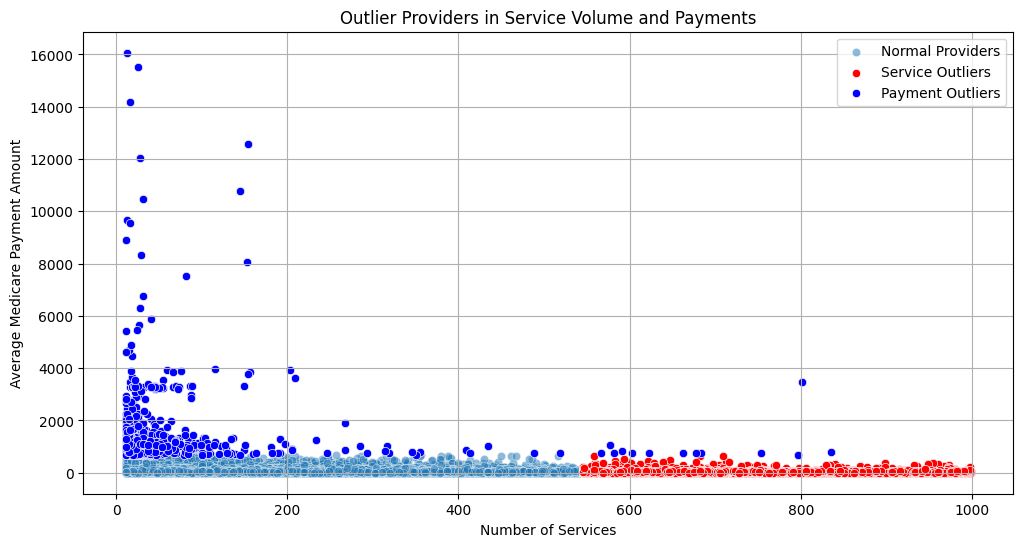

In [246]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, x='Number of Services', y='Average Medicare Payment Amount',
    alpha=0.5, label='Normal Providers'
)
sns.scatterplot(
    data=service_outliers, x='Number of Services', y='Average Medicare Payment Amount',
    color='red', label='Service Outliers'
)
sns.scatterplot(
    data=payment_outliers, x='Number of Services', y='Average Medicare Payment Amount',
    color='blue', label='Payment Outliers'
)
plt.title('Outlier Providers in Service Volume and Payments')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.legend()
plt.grid(True)
plt.show()


In [247]:
# Identify potential fraud based on charge-to-payment ratios
df['Charge-to-Payment Ratio'] = (
    df['Average Submitted Charge Amount'] / df['Average Medicare Payment Amount']
)

# Set a threshold for unusual ratios (e.g., >3 standard deviations from the mean)
ratio_zscores = zscore(df['Charge-to-Payment Ratio'])
fraudulent_providers = df[ratio_zscores > 3]

# Display results
print(f"Number of potentially fraudulent providers: {len(fraudulent_providers)}")


Number of potentially fraudulent providers: 366


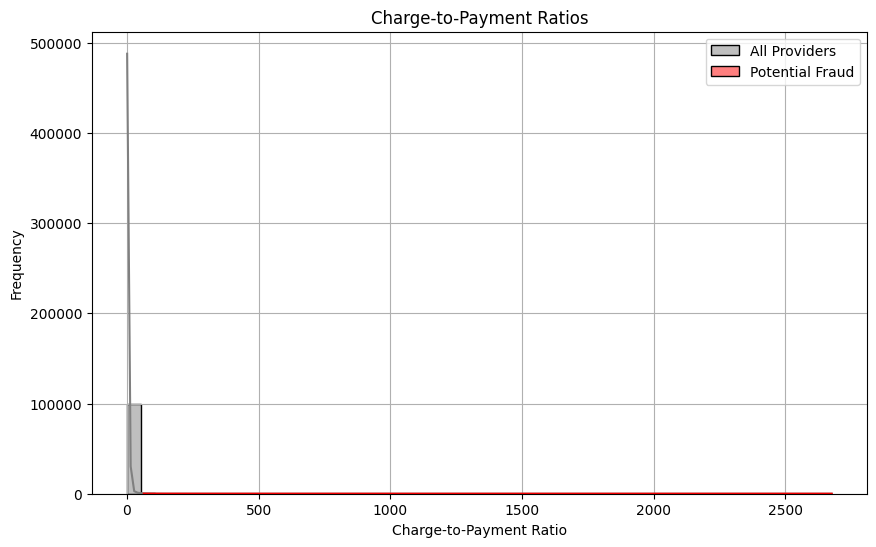

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Charge-to-Payment Ratio'], bins=50, color='gray', kde=True, label='All Providers')
sns.histplot(fraudulent_providers['Charge-to-Payment Ratio'], bins=50, color='red', kde=True, label='Potential Fraud')
plt.title('Charge-to-Payment Ratios')
plt.xlabel('Charge-to-Payment Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [249]:
# Group by HCPCS Code and calculate stats
hcpcs_stats = df.groupby('HCPCS Code')[['Number of Services', 'Average Medicare Payment Amount']].agg(['mean', 'std'])

# Flatten multi-level columns
hcpcs_stats.columns = [f'{col[0]}_{col[1]}' for col in hcpcs_stats.columns]

# Merge stats back into the original DataFrame
df = df.merge(hcpcs_stats, on='HCPCS Code', how='left')
df['Number of Services_mean']=df['Number of Services'].mean()
# df['Number of Services_std']=df['Number of Services'].std()
# Calculate Z-scores for service and payment anomalies
df['Service Z-Score HCPCS'] = (df['Number of Services'] - df['Number of Services_mean']) / df['Number of Services_std']
df['Payment Z-Score HCPCS'] = (df['Average Medicare Payment Amount'] - df['Average Medicare Payment Amount_mean']) / df['Average Medicare Payment Amount_std']

# Identify anomalies (Z-scores > 3 or < -3)
hcpcs_anomalies = df[(df['Service Z-Score HCPCS'].abs() > 3) | (df['Payment Z-Score HCPCS'].abs() > 3)]

# Display results
print(f"Number of anomalous HCPCS codes: {hcpcs_anomalies['HCPCS Code'].nunique()}")


Number of anomalous HCPCS codes: 1395


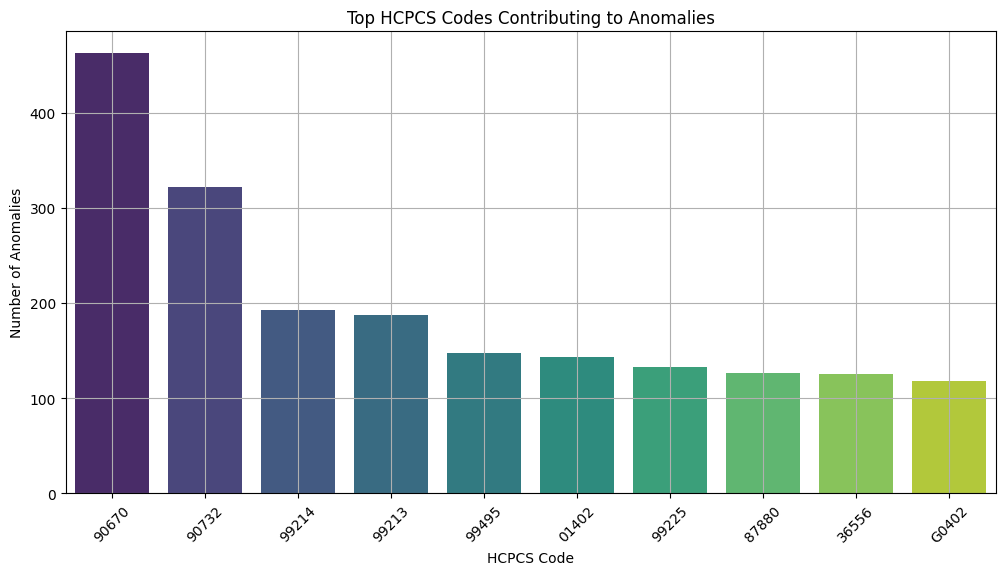

In [250]:
# Count anomalies by HCPCS Code
hcpcs_anomaly_counts = hcpcs_anomalies['HCPCS Code'].value_counts()

# Pareto chart
plt.figure(figsize=(12, 6))
sns.barplot(x=hcpcs_anomaly_counts.index[:10], y=hcpcs_anomaly_counts.values[:10], hue=hcpcs_anomaly_counts.index[:10], palette='viridis',legend=False)
plt.title('Top HCPCS Codes Contributing to Anomalies')
plt.xlabel('HCPCS Code')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **5. Service Metrics**
#### Insights:
- **Service Volume Trends:**
  - Compare the number of services across provider types and regions.
  - Analyze how service counts relate to financial metrics.

- **Beneficiary Analysis:**
  - Examine the number of beneficiaries per provider.
  - Spot providers catering to unusually high or low beneficiary counts.

#### Visualizations:
- Line plots for temporal trends (if data supports it).
- Bubble charts for service vs payment relationships.


In [251]:
df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Last Name/Organization Name of the Provider                  object
First Name of the Provider                                   object
Middle Initial of the Provider                               object
Credentials of the Provider                                  object
Gender of the Provider                                        int64
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                    float64
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                

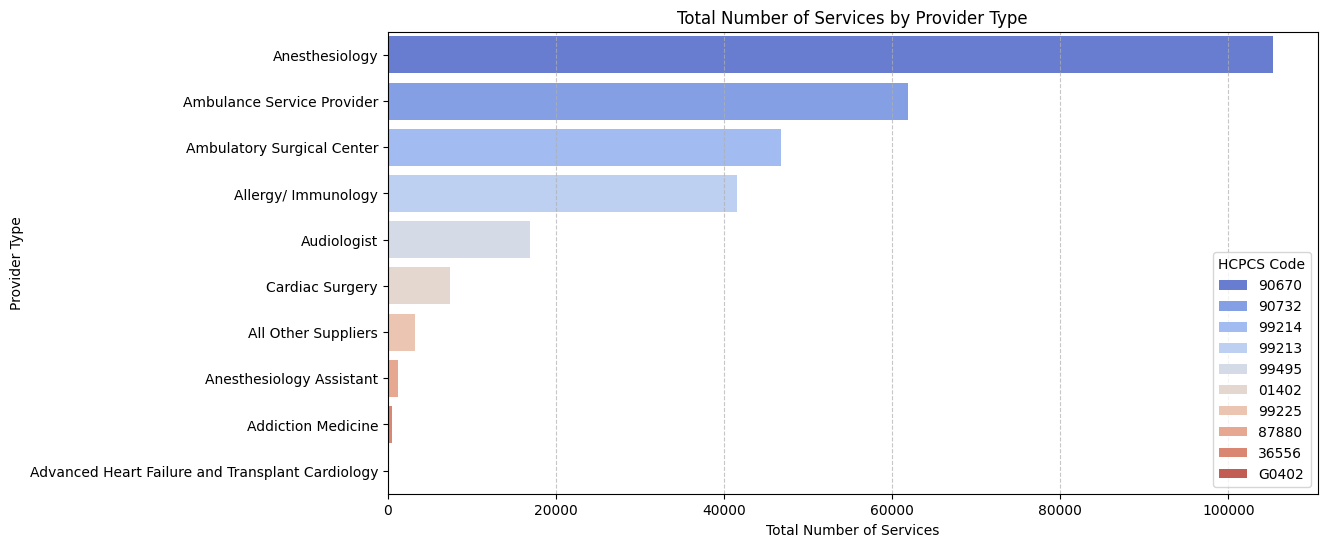

In [252]:

# Group by 'Provider Type' and sum up the 'Number of Services'
services_by_provider = df.groupby('Provider Type')['Number of Services'].sum().reset_index().head(10)

# Bar chart: Number of Services by Provider Type
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Number of Services', 
    y='Provider Type', 
    hue=hcpcs_anomaly_counts.index[:10],
    data=services_by_provider.sort_values(by='Number of Services', ascending=False),
    palette='coolwarm'
)
plt.title('Total Number of Services by Provider Type')
plt.xlabel('Total Number of Services')
plt.ylabel('Provider Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


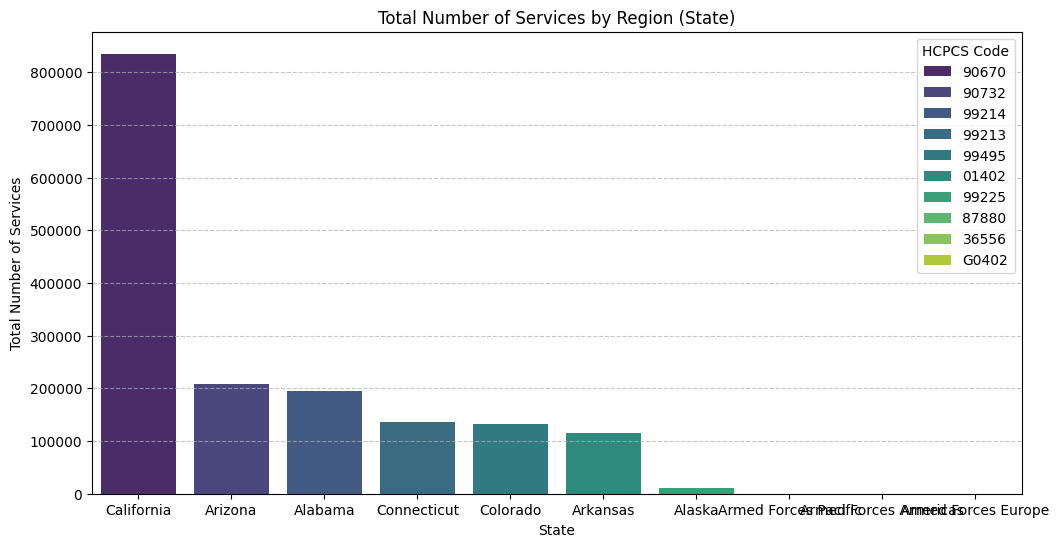

In [253]:
# Group by 'State Code' and sum up the 'Number of Services'
services_by_region = df.groupby('State Code of the Provider')['Number of Services'].sum().reset_index().head(10)

# Bar chart: Number of Services by State
plt.figure(figsize=(12, 6))
sns.barplot(
    x='State Code of the Provider', 
    y='Number of Services', 
    hue=hcpcs_anomaly_counts.index[:10], # Assign the y variable to hue,
    data=services_by_region.sort_values(by='Number of Services', ascending=False),
    palette='viridis'
)
plt.title('Total Number of Services by Region (State)')
plt.xlabel('State')
plt.ylabel('Total Number of Services')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


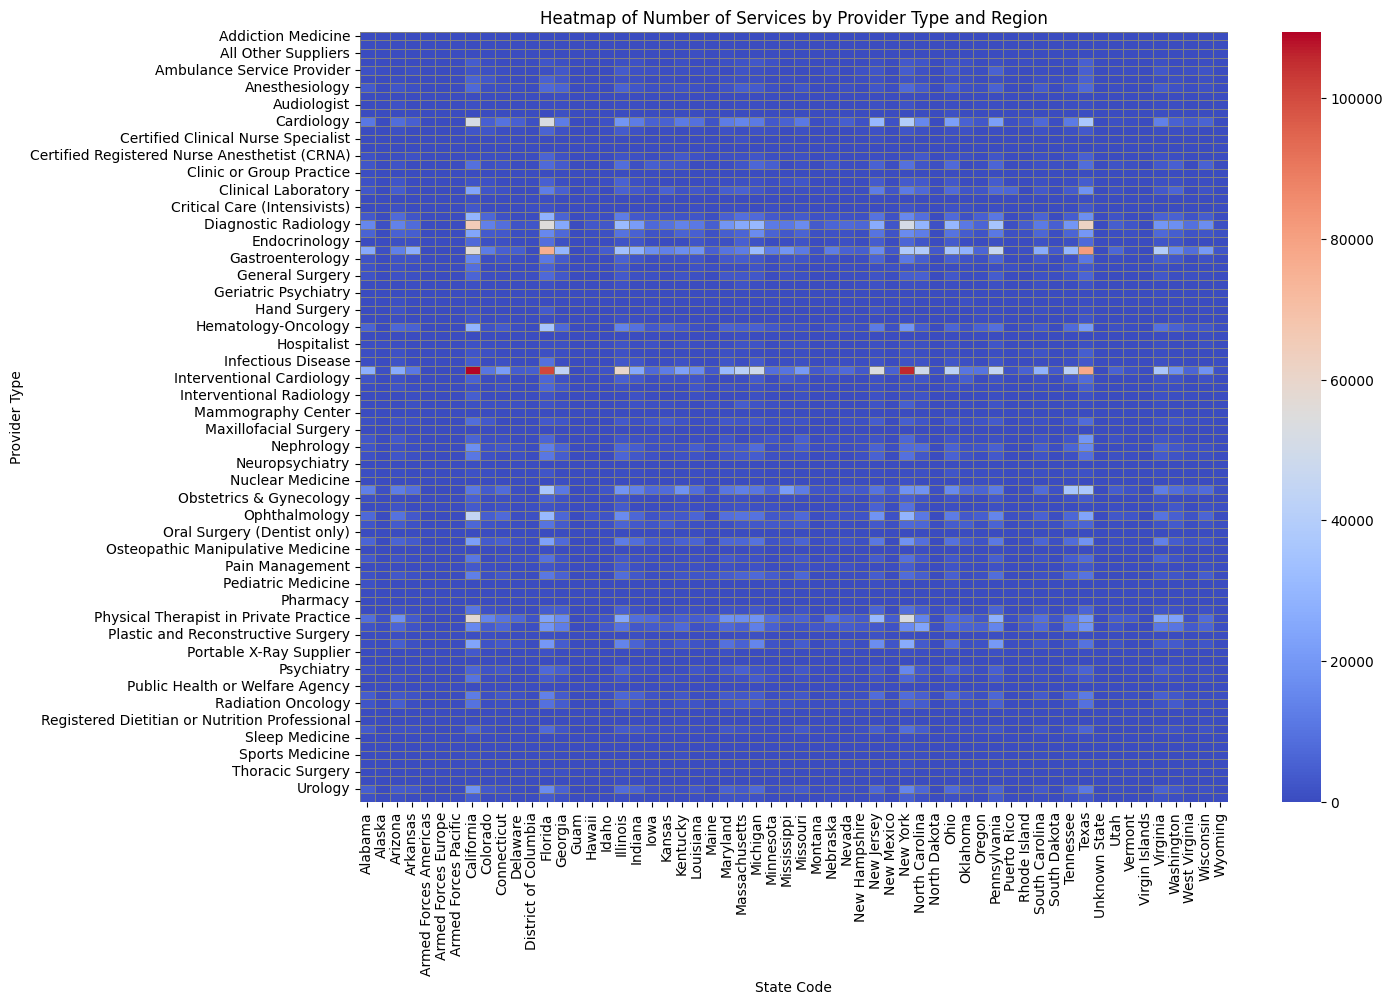

In [254]:
# Pivot table: Number of Services by Provider Type and State
heatmap_data = df.pivot_table(
    index='Provider Type', 
    columns='State Code of the Provider', 
    values='Number of Services', 
    aggfunc='sum', 
    fill_value=0
)

# Heatmap: Provider Types vs Regions
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data, 
    cmap='coolwarm', 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Heatmap of Number of Services by Provider Type and Region')
plt.xlabel('State Code')
plt.ylabel('Provider Type')
plt.show()


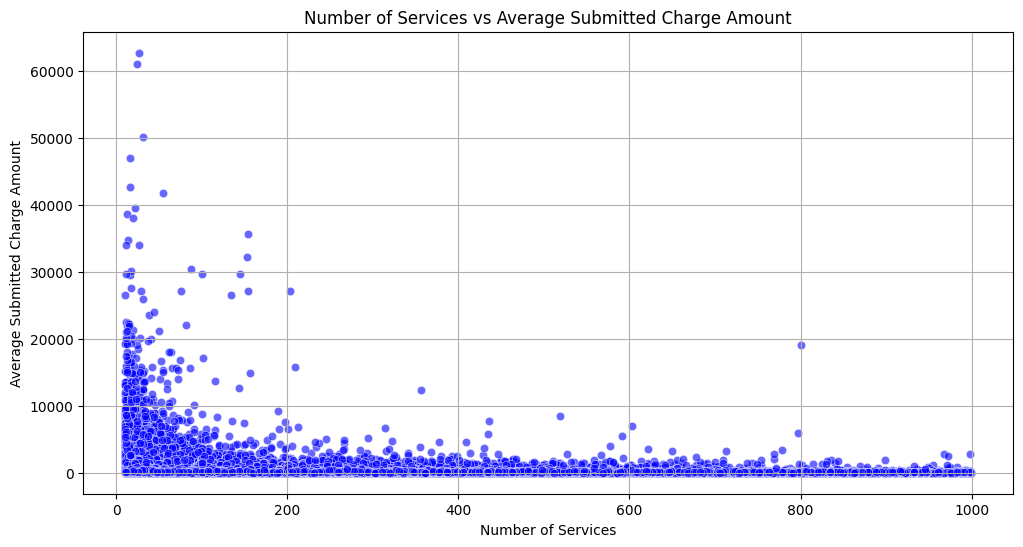

In [255]:


# Scatter Plot: Service Counts vs Submitted Charge Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['Number of Services'], 
    y=df['Average Submitted Charge Amount'], 
    alpha=0.6, 
    color='blue'
)
plt.title('Number of Services vs Average Submitted Charge Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()


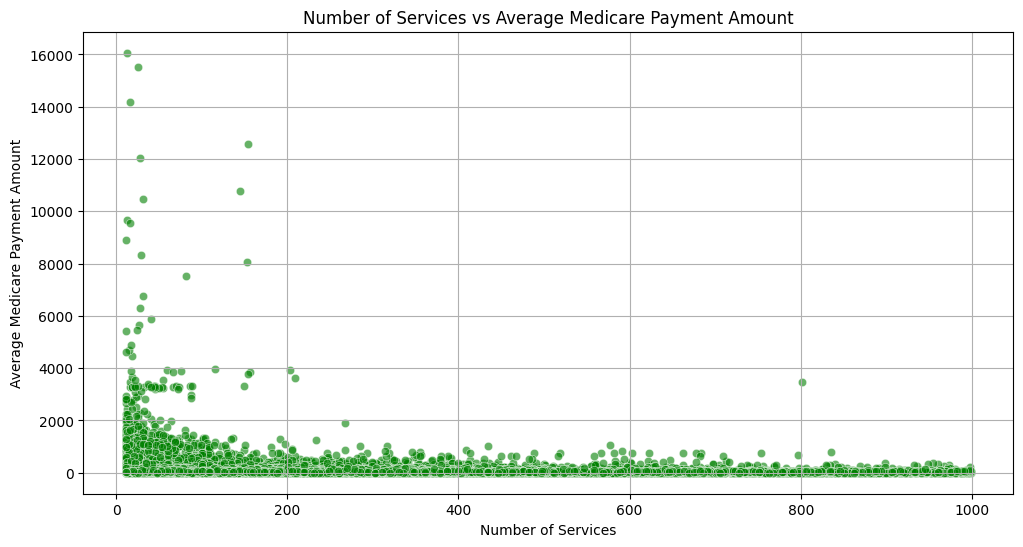

In [256]:

# Scatter Plot: Service Counts vs Medicare Payment Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['Number of Services'], 
    y=df['Average Medicare Payment Amount'], 
    alpha=0.6, 
    color='green'
)
plt.title('Number of Services vs Average Medicare Payment Amount')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.grid(True)
plt.show()




In [257]:
# Correlation Analysis
correlation_services_charges = df[['Number of Services', 'Average Submitted Charge Amount']].corr().iloc[0, 1]
correlation_services_payments = df[['Number of Services', 'Average Medicare Payment Amount']].corr().iloc[0, 1]

print(f"Correlation between Number of Services and Submitted Charge Amount: {correlation_services_charges:.2f}")
print(f"Correlation between Number of Services and Medicare Payment Amount: {correlation_services_payments:.2f}")

Correlation between Number of Services and Submitted Charge Amount: -0.07
Correlation between Number of Services and Medicare Payment Amount: -0.05


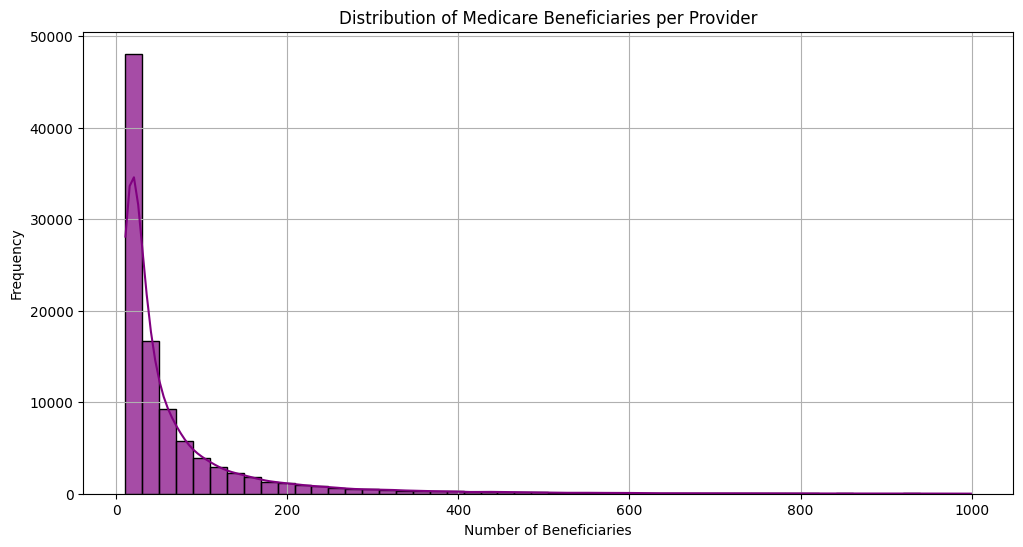

In [258]:

# Distribution Plot: Number of Beneficiaries
plt.figure(figsize=(12, 6))
sns.histplot(
    df['Number of Medicare Beneficiaries'], 
    bins=50, 
    kde=True, 
    color='purple', 
    alpha=0.7
)
plt.title('Distribution of Medicare Beneficiaries per Provider')
plt.xlabel('Number of Beneficiaries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


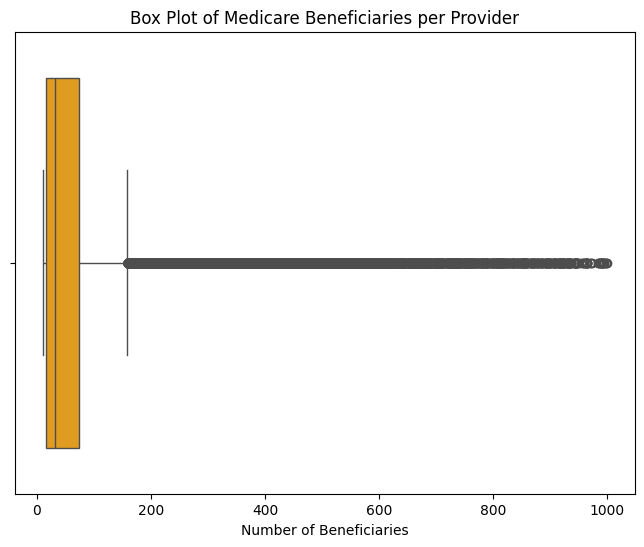

In [259]:

# Box Plot: Beneficiaries per Provider
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df['Number of Medicare Beneficiaries'], 
    color='orange'
)
plt.title('Box Plot of Medicare Beneficiaries per Provider')
plt.xlabel('Number of Beneficiaries')
plt.show()



In [260]:
# Highlight Top 10 Providers by Beneficiary Count
top_10_providers = df.nlargest(10, 'Number of Medicare Beneficiaries')[['National Provider Identifier', 'Number of Medicare Beneficiaries']]
print("Top 10 Providers by Number of Medicare Beneficiaries:")
print(top_10_providers)



Top 10 Providers by Number of Medicare Beneficiaries:
       National Provider Identifier  Number of Medicare Beneficiaries
63565                    1497839328                             999.0
11044                    1972566248                             998.0
53925                    1013076272                             997.0
14095                    1407833825                             995.0
38958                    1174578280                             995.0
636                      1316204464                             993.0
99307                    1457728719                             993.0
68505                    1215141114                             991.0
35192                    1225035132                             990.0
58549                    1073747259                             990.0


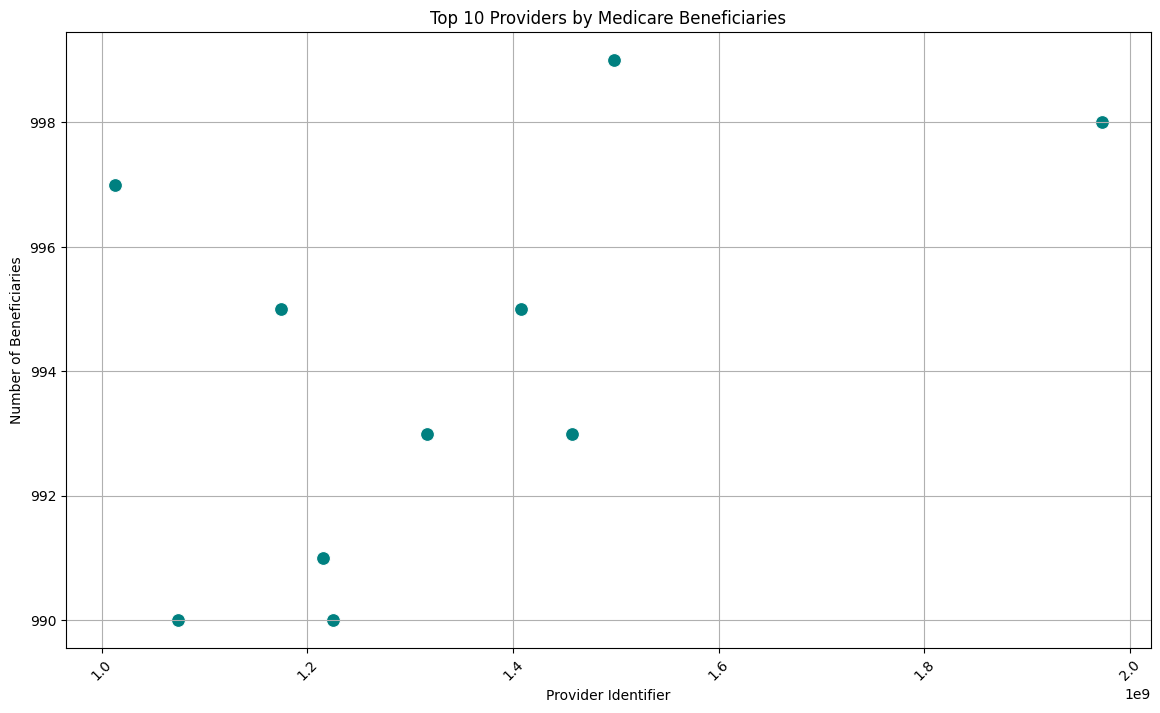

In [261]:
# Scatter Plot: Number of Beneficiaries vs Provider
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x='National Provider Identifier', 
    y='Number of Medicare Beneficiaries', 
    data=top_10_providers, 
    color='teal', 
    s=100
)
plt.title('Top 10 Providers by Medicare Beneficiaries')
plt.xlabel('Provider Identifier')
plt.ylabel('Number of Beneficiaries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [262]:
# # Example: Line Plot for Average Medicare Payments Over Time
# # Ensure your dataset has a 'Year' or 'Month' column. Adjust column names accordingly.

# # Group by time and calculate metrics
# if 'Year' in df.columns:
#     temporal_trend = df.groupby('Year')['Average Medicare Payment Amount'].mean().reset_index()

#     # Line plot
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(
#         x='Year', 
#         y='Average Medicare Payment Amount', 
#         data=temporal_trend, 
#         marker='o', 
#         color='blue'
#     )
#     plt.title('Average Medicare Payments Over Time')
#     plt.xlabel('Year')
#     plt.ylabel('Average Payment ($)')
#     plt.grid(True)
#     plt.show()
# else:
#     print("The dataset does not contain a 'Year' column to analyze temporal trends.")


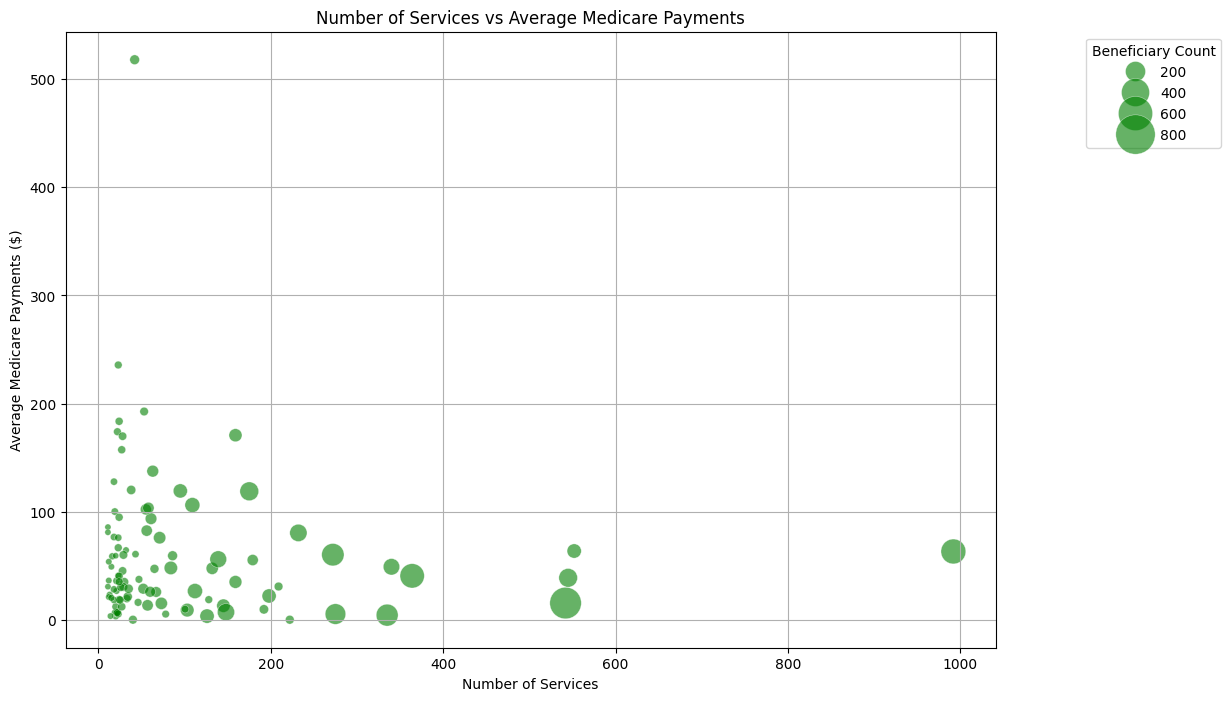

In [263]:
# Bubble Chart: Number of Services vs Average Medicare Payments
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df['Number of Services'].head(100), 
    y=df['Average Medicare Payment Amount'].head(100), 
    size=df['Number of Medicare Beneficiaries'], 
    sizes=(20, 1000),  # Scale for bubbles
    alpha=0.6,
    color='green'
)
plt.title('Number of Services vs Average Medicare Payments')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payments ($)')
plt.legend(title='Beneficiary Count', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


### **6. Data Quality and Patterns**
#### Insights:
- **Missing Data Patterns:**
  - Visualize patterns in missing values.
  - Suggest data improvement or collection strategies.

- **Duplication and Consistency Checks:**
  - Validate address and credential consistency across providers.

#### Visualizations:
- Heatmaps for missing data.
- Cluster maps for address consistency.

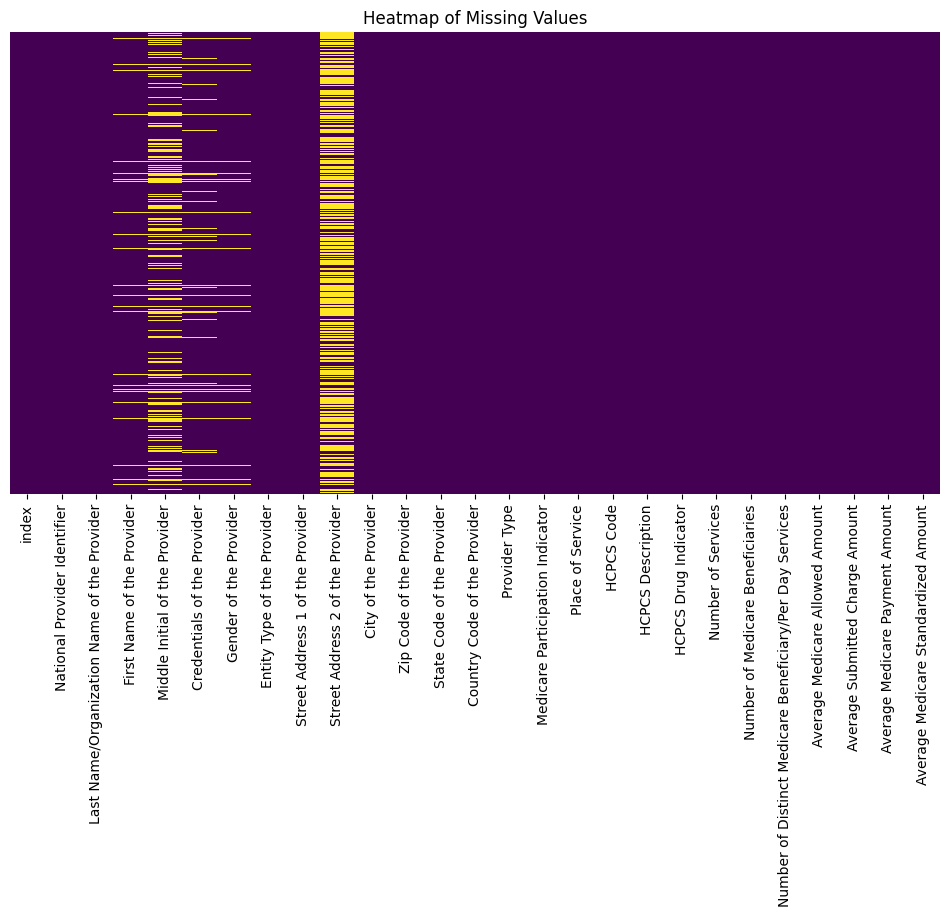

Missing Values Summary:
Street Address 2 of the Provider    59363
Middle Initial of the Provider      29331
Credentials of the Provider          7209
First Name of the Provider           4255
Gender of the Provider               4254
dtype: int64


C:\Users\katta\AppData\Local\Temp\ipykernel_18056\864108282.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




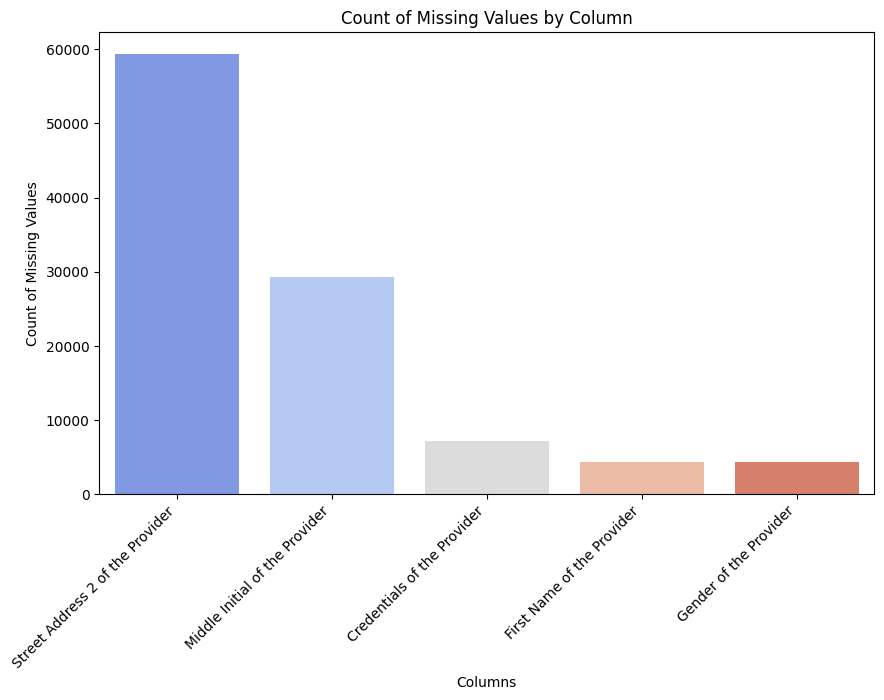

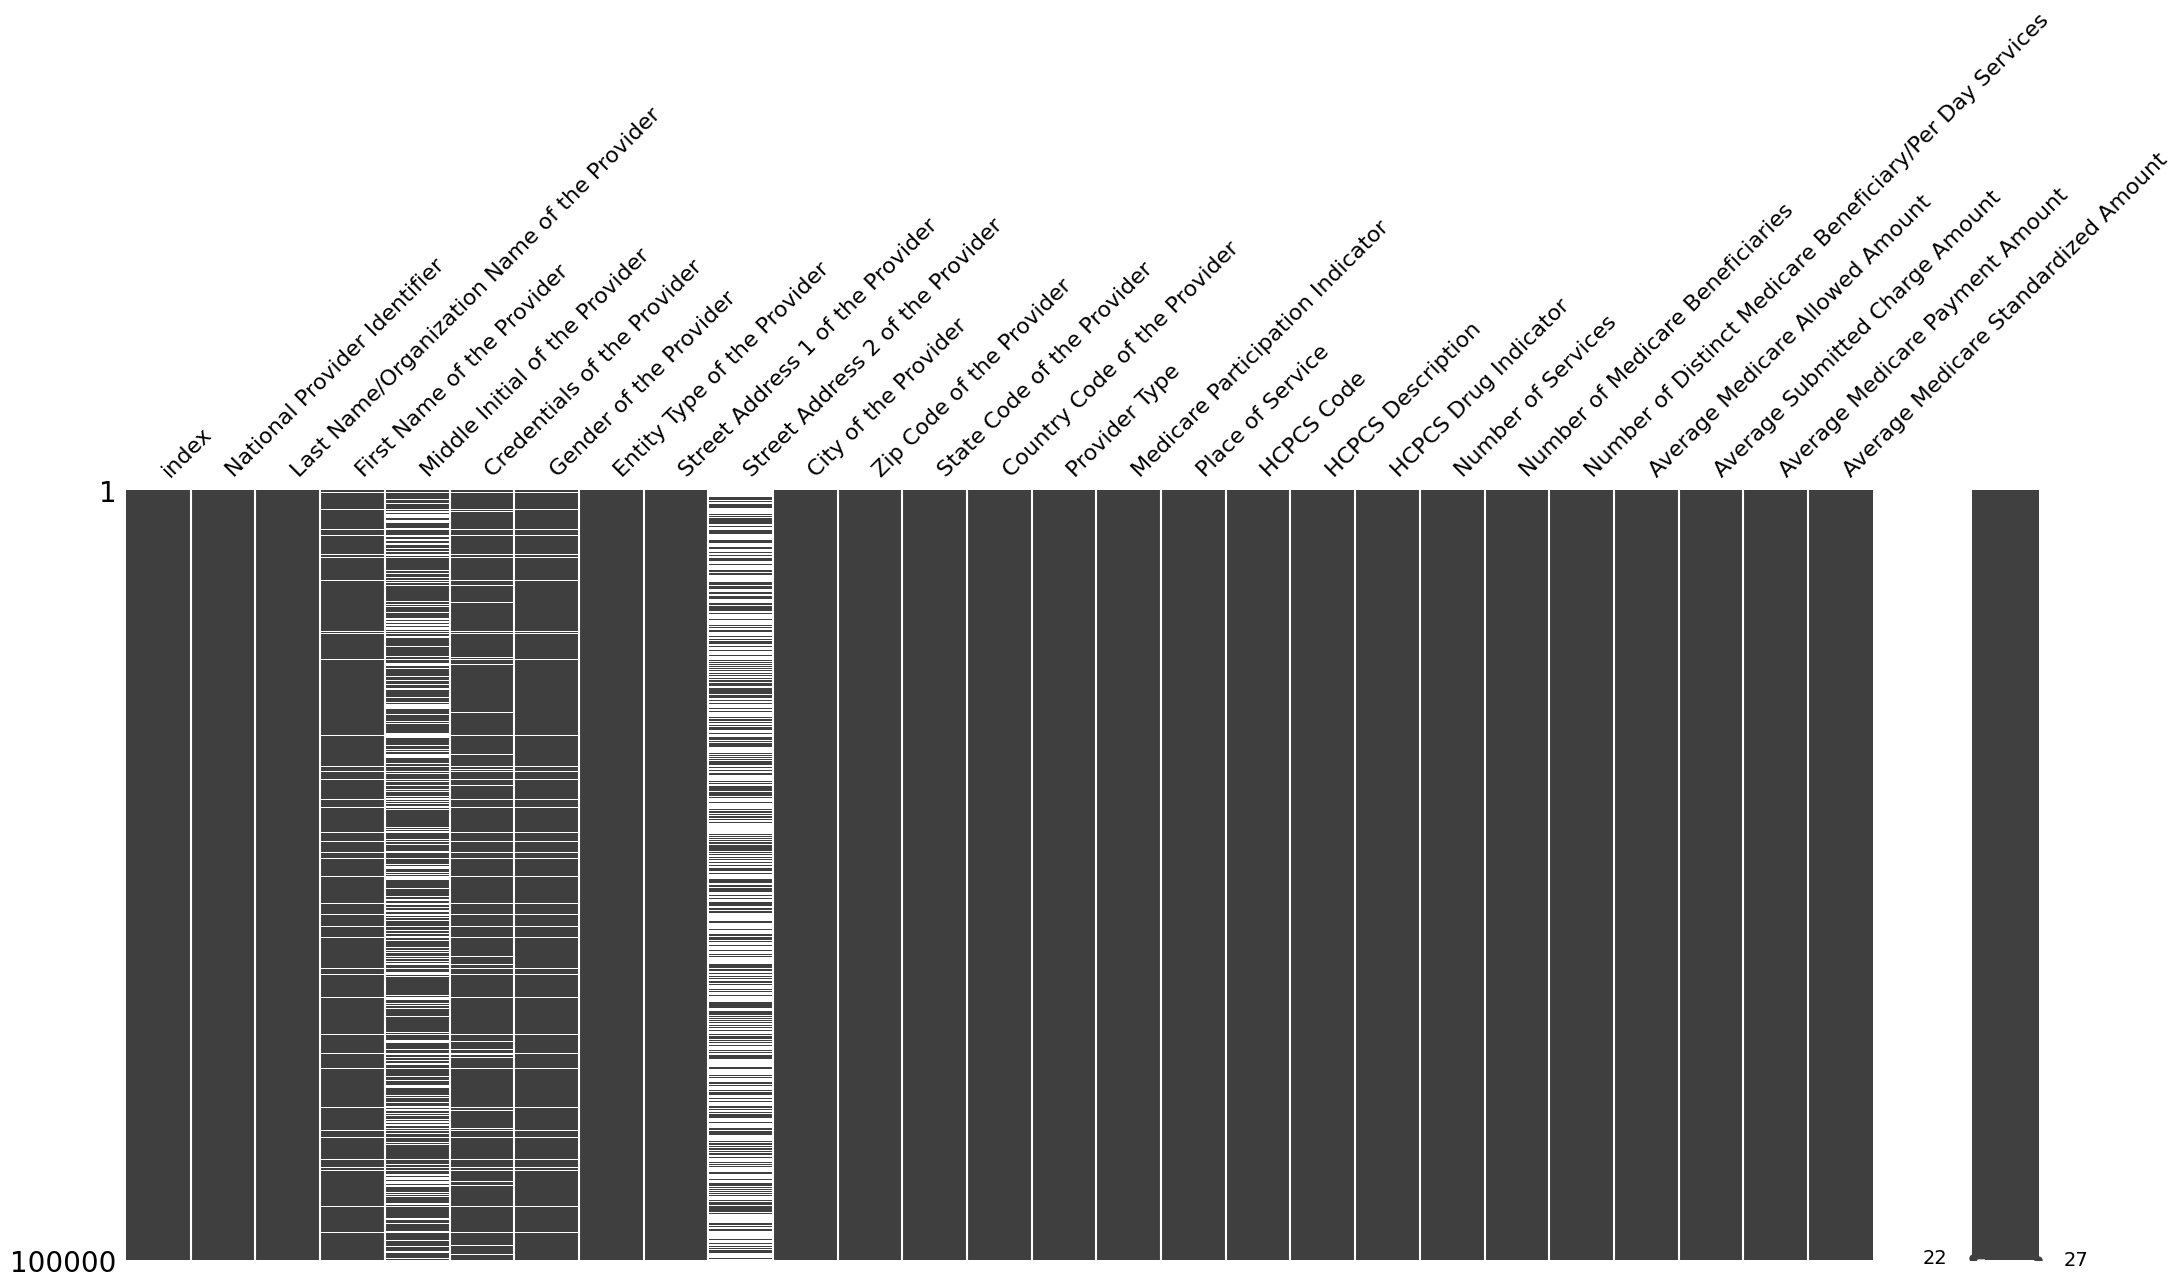

In [264]:
import missingno as msno
df=pd.read_csv('Healthcare Providers.csv')
# Count missing values in each column
missing_counts = df.isnull().sum()

# Heatmap for Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

# Missing Value Summary Table
missing_summary = missing_counts[missing_counts > 0].sort_values(ascending=False)
if not missing_summary.empty:
    print("Missing Values Summary:")
    print(missing_summary)
else:
    print("No missing values detected in the dataset.")

# Bar Plot for Missing Values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title('Count of Missing Values by Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()

# Visualize Missing Data Correlation
msno.matrix(df)
plt.show()








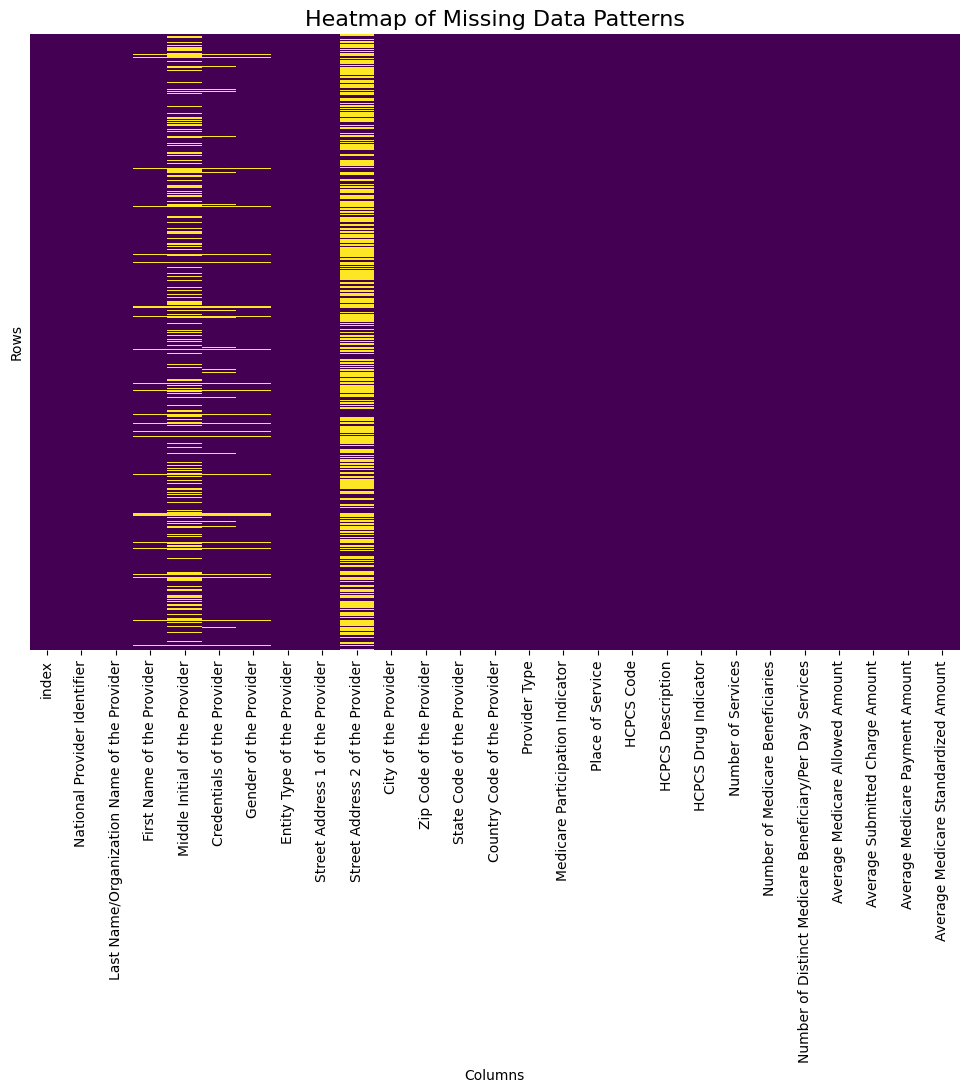

In [265]:
# Heatmap for Missing Data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data Patterns", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_dataset.csv' with your actual file
df = pd.read_csv('Healthcare Providers.csv')

# Function to analyze missing values
def analyze_missing_values(df):
    missing_summary = df.isnull().sum().sort_values(ascending=False)
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_data = pd.DataFrame({
        "Missing Count": missing_summary,
        "Missing Percentage": missing_percentage
    })
    return missing_data[missing_data["Missing Count"] > 0]

# Function to identify anomalies
def detect_anomalies(df, threshold=3):
    anomalies = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers = df[np.abs(z_scores) > threshold]
        if not outliers.empty:
            anomalies[col] = len(outliers)
    return anomalies

# Function to check categorical consistency
def check_categorical_consistency(df):
    inconsistent_categories = {}
    for col in df.select_dtypes(include=['object']).columns:
        unique_values = df[col].unique()
        if len(unique_values) > 20:  # Arbitrary threshold for too many categories
            inconsistent_categories[col] = len(unique_values)
    return inconsistent_categories

# Function to suggest strategies
def suggest_strategies(missing_data, anomalies, inconsistent_categories):
    print("=== Suggestions for Data Improvement ===\n")
    
    # Missing Values
    if not missing_data.empty:
        print("1. Missing Values:")
        print("   - Implement mandatory fields during data entry for the following columns:")
        print(f"     {list(missing_data.index)}")
        print("   - Use statistical imputation or predictive models to fill missing values.\n")
    else:
        print("1. No significant missing values detected.\n")
    
    # Anomalies
    if anomalies:
        print("2. Anomalies Detected:")
        for col, count in anomalies.items():
            print(f"   - Column '{col}' has {count} anomalies.")
        print("   - Establish acceptable thresholds or use outlier detection methods for cleaning.\n")
    else:
        print("2. No significant anomalies detected.\n")
    
    # Categorical Consistency
    if inconsistent_categories:
        print("3. Inconsistent Categorical Data:")
        for col, count in inconsistent_categories.items():
            print(f"   - Column '{col}' has {count} unique categories. Consider standardizing.\n")
    else:
        print("3. Categorical data appears consistent.\n")

# Analyze the dataset
missing_data = analyze_missing_values(df)
anomalies = detect_anomalies(df)
inconsistent_categories = check_categorical_consistency(df)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Suggest strategies
suggest_strategies(missing_data, anomalies, inconsistent_categories)


In [ ]:
df.dtypes

In [ ]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with your file
df = pd.read_csv('Healthcare Providers.csv')

# Function to check for duplicates
def check_duplicates(df, subset_columns=None):
    if subset_columns:
        duplicates = df.duplicated(subset=subset_columns, keep=False)
    else:
        duplicates = df.duplicated(keep=False)
    duplicate_records = df[duplicates]
    return duplicate_records

# Function to check address consistency
def check_address_consistency(df, address_columns):
    inconsistent_addresses = {}
    for col in address_columns:
        unique_values = df[col].nunique()
        if unique_values != len(df):
            inconsistent_addresses[col] = unique_values
    return inconsistent_addresses

# Function to validate credential consistency
def validate_credentials(df, credential_column):
    credentials_missing = df[credential_column].isnull().sum()
    invalid_credentials = df[~df[credential_column].str.match(r'^[A-Za-z0-9\s,.-]+$', na=False)]
    return credentials_missing, invalid_credentials

# Specify columns for address validation
address_columns = ['Street Address 1 of the Provider', 'City of the Provider', 'State Code of the Provider', 'Zip Code of the Provider']

# Specify column for credential validation
credential_column = 'Credentials of the Provider'

# Check for duplicates
duplicate_records = check_duplicates(df, subset_columns=address_columns)

# Check address consistency
address_inconsistencies = check_address_consistency(df, address_columns)

# Validate provider credentials
missing_credentials, invalid_credentials = validate_credentials(df, credential_column)

# Print results
print("=== Duplication and Consistency Check Results ===")
if not duplicate_records.empty:
    print(f"1. Found {len(duplicate_records)} duplicate records. Here are the duplicates:")
    print(duplicate_records.head())
else:
    print("1. No duplicate records found.\n")

if address_inconsistencies:
    print("2. Address Consistency Issues Detected:")
    for col, unique_count in address_inconsistencies.items():
        print(f"   - Column '{col}' has {unique_count} unique entries, indicating potential duplicates or inconsistencies.")
else:
    print("2. Address columns appear consistent.\n")

if missing_credentials > 0 or not invalid_credentials.empty:
    print("3. Credential Validation Issues Detected:")
    print(f"   - {missing_credentials} missing credentials found.")
    if not invalid_credentials.empty:
        print(f"   - {len(invalid_credentials)} invalid credential entries. Example:")
        print(invalid_credentials.head())
else:
    print("3. Credentials appear consistent.\n")
